# **Final Project - Analysis of Sensitive Attributes in Speed Dating**

## Importing the dependencies and data

In [3]:
import pandas as pd
import pylab
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from statsmodels.stats import proportion
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc


This data is retrieved from: https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment 

In [4]:
# Read in the data
csv = 'Speed Dating Data.csv'
original = pd.read_csv(csv, header=0, sep=',',
                       engine='python', na_values="?", encoding='latin1')
rows = original.shape[0]

In [5]:
initial_length = len(original)
print(initial_length)
original.head()

8378


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Cleaning Data

Analyzing the missing data values, we can see that for some columns, there is a major amount of data missing, around 50-80% for the followup survey questions asked of participants after 3-4 weeks. we will remove these becasue of the sheer amount of missing data.

In [6]:
original.drop(columns=['you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3'], axis=1, inplace=True)
original.drop(columns=['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3'], axis=1, inplace=True)
original.drop(columns=['attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3'], axis=1, inplace=True)
original.drop(columns=['attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3'], axis=1, inplace=True)
original.drop(columns=['attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3'], axis=1, inplace=True)
original.drop(columns=['attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'], axis=1, inplace=True)
original.drop(columns=['attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3'], axis=1, inplace=True)

While having a higher response rate(89%) only a day after the speed dating event, many prompts were left blank still. 7_2 was left blank by ~77% of subjects, 5_2 was left blank by ~48% of subjects, and 2_2 was left blank by ~31% of subjects. Even though some of the prompts have around 89% response rate, since the analysis of our project is central to the couples liking eachother and/or matching, we will also remove all responses to prompts asked after the event because the predictions will be altered by knowing the future, and there is significant missing data.

In [7]:
original.drop(columns=['satis_2', 'length', 'numdat_2'], axis=1, inplace=True)
original.drop(columns=['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2'], axis=1, inplace=True)
original.drop(columns=['attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2'], axis=1, inplace=True)
original.drop(columns=['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2'], axis=1, inplace=True)
original.drop(columns=['attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2'], axis=1, inplace=True)
original.drop(columns=['attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2'], axis=1, inplace=True)
original.drop(columns=['attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2'], axis=1, inplace=True)

Finally, the last section with major missing data was when the subjects were prompted halfway through the event. This had a response rate of roughly 50%. We will drop these columns as well.

In [8]:
original.drop(columns=['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s'], axis=1, inplace=True)
original.drop(columns=['attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s'], axis=1, inplace=True)

Now we check the remaining missing values and clean them as we go.

In [9]:
# Check for NaN or missing values
null_counts = original.isnull().sum()
# Print columns with missing values and their count
for column, missing_count in null_counts.items():
    if missing_count > 0:
        print(f"Column '{column}' has {missing_count} missing values")


Column 'id' has 1 missing values
Column 'positin1' has 1846 missing values
Column 'pid' has 10 missing values
Column 'int_corr' has 158 missing values
Column 'age_o' has 104 missing values
Column 'race_o' has 73 missing values
Column 'pf_o_att' has 89 missing values
Column 'pf_o_sin' has 89 missing values
Column 'pf_o_int' has 89 missing values
Column 'pf_o_fun' has 98 missing values
Column 'pf_o_amb' has 107 missing values
Column 'pf_o_sha' has 129 missing values
Column 'attr_o' has 212 missing values
Column 'sinc_o' has 287 missing values
Column 'intel_o' has 306 missing values
Column 'fun_o' has 360 missing values
Column 'amb_o' has 722 missing values
Column 'shar_o' has 1076 missing values
Column 'like_o' has 250 missing values
Column 'prob_o' has 318 missing values
Column 'met_o' has 385 missing values
Column 'age' has 95 missing values
Column 'field' has 63 missing values
Column 'field_cd' has 82 missing values
Column 'undergra' has 3464 missing values
Column 'mn_sat' has 5245 mi

In [10]:
# drop the one row with missing id.
original = original.dropna(subset=['id'])

# drop the row positin1(station number where started) as it has a lot of missing data and should not 
# have any significant impact on if the two subjects like each other.
original.drop('positin1', axis=1, inplace=True)

# drop the rows with missing pid(partner’s iid number) knowing the partners iid is crucial to the prediction.
original = original.dropna(subset=['pid'])

# drop rows with null values for int_corr(correlation between participant’s and partner’s ratings of interests) 
# as this may be an important factor in matching.
original = original.dropna(subset=['int_corr'])

# Attempted to add the race_o and age_o of the partners to the dataset by crossreferencing iid age and race, but in 
# all cases, these were missing. since these are necessary things for our study we have no choice but to drop the rows with these NaN values.
original = original.dropna(subset=['age', 'race', 'age_o', 'race_o'])

# the ratings of the parther the night of the event have a surprising number of missing values, upon further inspection, this is because these rows
# are filled by the participant allocating 100 points, and the assumption we use is that if the value is NaN, the subject left it blank and intended
# to input 0 of their points there.
columns_to_fill = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha','attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']

original[columns_to_fill] = original[columns_to_fill].fillna(0)

# At this time we also decided to drop the rows from waves 6-9 because instead of 100 point allocation, the input from the 
# participant was a simple 1-10 there is no good way to relate these, as a participant can list all categories as 10 importance, 
# and that would not be a simple correlation to 100 pt allocation.
original = original[~original['wave'].isin([6, 7, 8, 9])]

# like, prob(if the participant thinks the other person liked them), and met(if theyve met before) are all important attributes
# and cant be averaged or otherwise simulated. We decided to drop the rows with null values for these attributes.
original = original.dropna(subset=['like_o', 'prob_o', 'met_o', 'like', 'prob', 'met'])

# field_cd is the field they work in, coded to an index. missing values we have replaced with the other field = 18
# field is a text value meaning the same as field_cd, this column is dropped as it is unecessary.
original['field_cd'] = original['field_cd'].fillna(18)
original.drop('field', axis=1, inplace=True)

# undergra,  mn_sat, tuition all have many missing values, and these variables are used to determine intelligence based on school they attended if any. since 
# the applicants rate their own intellignece in int3_1, we will drop these columns instead of trying to generate filler data based on assumptions.
original.drop(columns=['undergra', 'mn_sat', 'tuition'], axis=1, inplace=True)

# zipcode and income are determined using the zipcode the participant grew up in. This can be problematic because of high degrees af variance in
# each zipcode. Based on this and the number of missing values we will also drop these columns.
original.drop(columns=['zipcode', 'income'], axis=1, inplace=True)

# drop rows where date(how frequently does the participant go on dates) is null, as this value is important and there are only a few of instances where the value is null.
original = original.dropna(subset=['date'])

# career is the field they intend to work in, career_c is that coded to an index. missing values we have replaced with the other field = 15
# career is a text value meaning the same as career_c, this column is dropped as it is unecessary.
original['career_c'] = original['career_c'].fillna(15)
original.drop('career', axis=1, inplace=True)

# expnum is the expected number of people they expect to like them at the event. Over half of the participants did not fill out this prompt it is dropped.
original.drop('expnum', axis=1, inplace=True)

# some _1 prompts asked just before the event have very few missing values, the rows that are empty are believed to be zero due to 100pt allocation
prompts_1 = ['fun1_1', 'amb1_1', 'shar1_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', ]

original[prompts_1] = original[prompts_1].fillna(0)

# 4_1 prompts(what you think MOST of your fellow men/women look for in the opposite sex) have significant number of missing values, these columns will be dropped.
original.drop(columns=['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1'], axis=1, inplace=True)

# 5_1 prompts(how do you think others perceive you?) have significant number of missing values, these columns will be dropped.
original.drop(columns=['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1'], axis=1, inplace=True)

# the plain attribute variables attr, sinc, intel, fun, amb, shar are all very important as they are the ratings that the participants give their partners. even though there
# are around 500 missing values, to keep the data, we'll have to drop rows with missing values.
original = original.dropna(subset=['attr', 'sinc', 'intel', 'fun', 'amb', 'shar'])

# finally, match_es is the expected number of people they expect to match with at the event. To avoid losing more data, and due to this column 
# seeming insignificant, it is dropped
original.drop('match_es', axis=1, inplace=True)

# Lastly, the from column, is where each participant is from, the locations vary greatly and some answers are sarcastic or too literal. seems irrelevent to our study
original.drop('from', axis=1, inplace=True)

Now we can see there are no remaining null values in the dataframe.

In [11]:
# Check for NaN or missing values
new_null_counts = original.isnull().sum()
# Print columns with missing values and their count
for column, missing_count in new_null_counts.items():
    if missing_count > 0:
        print(f"Column '{column}' has {missing_count} missing values")

In [12]:
print('percentage of data lost to null cleaning = ', ((initial_length - len(original))/initial_length))
print(len(original))

percentage of data lost to null cleaning =  0.3860109811410838
5144


In [13]:
# Define demographic influences
age = original['age']
age_o = original['age_o']
gender_key = {0: 'Female', 1: 'Male'}
gender = original['gender']
gender.replace(gender_key, inplace=True)
race_key = {1: 'Black', 2: 'White', 3: 'Latino', 4: 'Asian', 5: 'Native American', 6: 'Other'}
race = original['race']

In [14]:
# Remove races from race_key if they are not present in study
keys = list(race_key.keys())
for i in range(len(keys)):
    if keys[i] not in race.values:
        del race_key[keys[i]]
        i -= 1
race.replace(race_key, inplace=True)
race_o = original['race_o']
race_o.replace(race_key, inplace=True)

decision = original['dec'] # 0 no, 1 yes
decision_o = original['dec_o']
match = original['match'] # 1 if both parties decided yes, 0 otherwise

## Data Analysis

In [15]:
# Get the list of races and add an overall likelihood
races = list(race_key.values())
races.insert(0, "Overall")

# Likelihood of each race deciding yes for each other race
likelihood_df = pd.DataFrame(index=races, columns=races)

In [16]:
def calculate_likelihood(data, decision, race, race_o):
    # Calculate the likelihood
    for race1 in races:
        for race2 in races:
            # Filter the data for the specific race combination
            filtered_data = decision[((race1 == "Overall") | (race == race1)) &
                                     ((race2 == "Overall") | (race_o == race2))]

            # Calculate the likelihood of deciding yes
            if len(filtered_data) == 0:
                likelihood = np.nan
            else:
                likelihood = sum(filtered_data) / len(filtered_data)

            # Store the likelihood in the dataframe
            data.loc[race1, race2] = likelihood

In [17]:
calculate_likelihood(likelihood_df, decision, race, race_o)

# Print the likelihood dataframe
print("\nLikelihood of Choosing Yes (rows are decision maker)")
print(likelihood_df)

# Use only male entries
male_decision = decision[gender == 'Male']
male_race = race[gender == 'Male']
male_race_o = race_o[gender == 'Male']
calculate_likelihood(likelihood_df, male_decision, male_race, male_race_o)

# Print the likelihood dataframe
print("\nLikelihood of Men Choosing Yes (rows are decision maker)")
print(likelihood_df)

# Use only female entries
female_decision = decision[gender == 'Female']
female_race = race[gender == 'Female']
female_race_o = race_o[gender == 'Female']
calculate_likelihood(likelihood_df, female_decision, female_race, female_race_o)

# Print the likelihood dataframe
print("\nLikelihood of Women Choosing Yes (rows are decision maker)")
print(likelihood_df)


Likelihood of Choosing Yes (rows are decision maker)
          Overall     Black     White    Latino     Asian     Other
Overall  0.425156  0.405063  0.455642  0.453725  0.359193   0.40056
Black    0.527897  0.769231  0.556452  0.681818  0.354839  0.583333
White     0.39544  0.388889   0.43833  0.408511  0.304985  0.349727
Latino   0.397059  0.363636  0.410377       0.5  0.302752  0.551724
Asian    0.452292  0.369231  0.474719  0.403509  0.452663  0.401961
Other    0.520548  0.454545  0.513228  0.722222  0.479592  0.483871

Likelihood of Men Choosing Yes (rows are decision maker)
          Overall     Black     White    Latino     Asian     Other
Overall  0.468496  0.436364  0.492709  0.501818  0.420833  0.452514
Black    0.577236  0.666667   0.66129    0.6875  0.354839       0.5
White    0.440824  0.466667  0.466328  0.486667  0.382353  0.393939
Latino   0.435583  0.222222  0.460526  0.529412  0.354167  0.615385
Asian    0.467662  0.333333   0.50173  0.382353  0.465517   0.47619
Othe

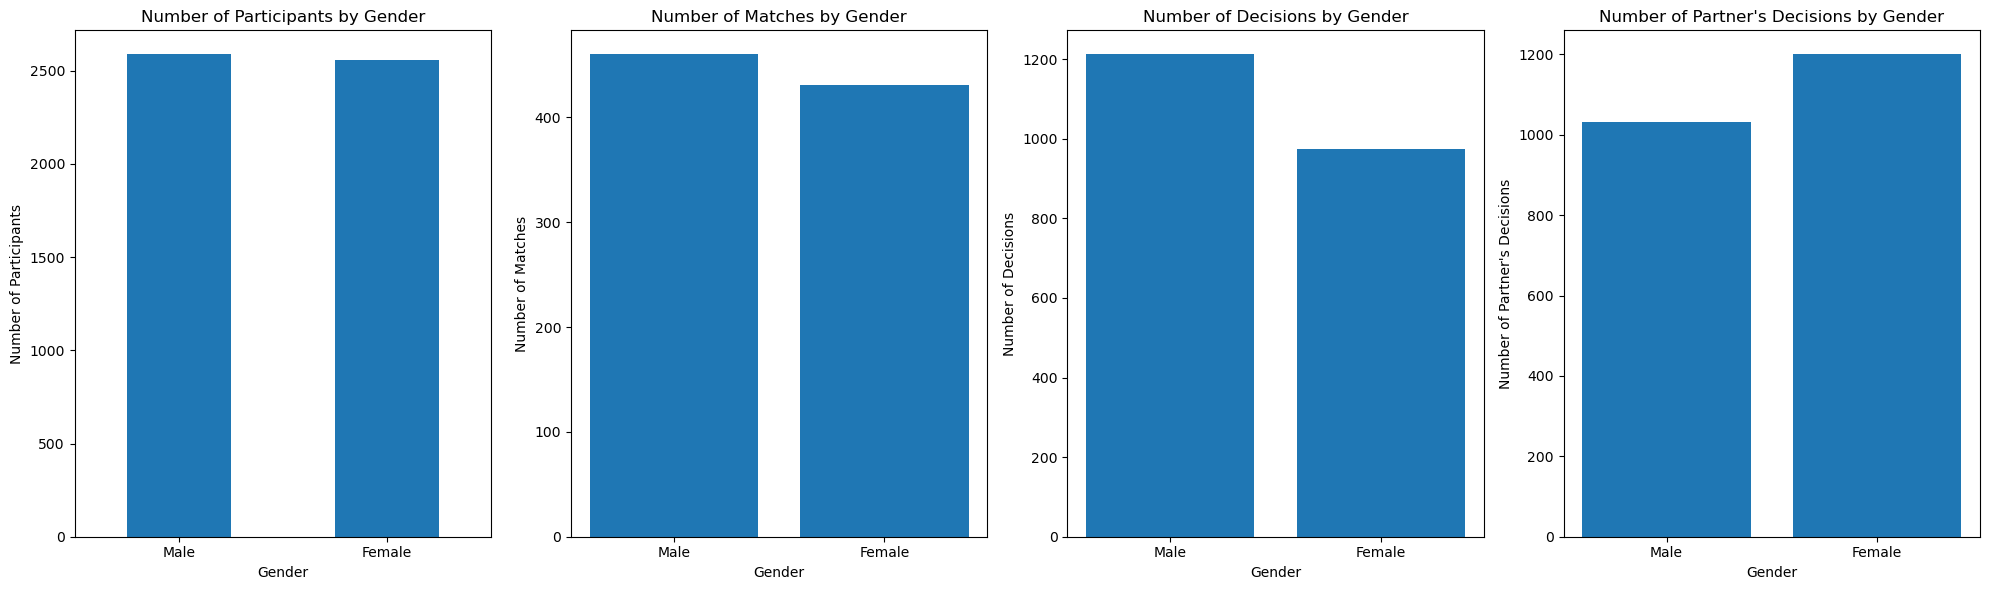

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Plot the number of participants by gender
original.gender.value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Gender')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0)
axs[0].set_ylabel('Number of Participants')
axs[0].set_title('Number of Participants by Gender')

# Plot the number of matches by gender
genders = ['Male', 'Female']
match_counts_gender = [
    len(original[(original['gender'] == 'Male') & (original['match'] == 1)]),
    len(original[(original['gender'] == 'Female') & (original['match'] == 1)])
]

axs[1].bar(genders, match_counts_gender, label='Matches')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Number of Matches')
axs[1].set_title('Number of Matches by Gender')

# Plot the number of decisions (dec) by gender
dec_counts_gender = [
    len(original[(original['gender'] == 'Male') & (original['dec'] == 1)]),
    len(original[(original['gender'] == 'Female') & (original['dec'] == 1)])
]

axs[2].bar(genders, dec_counts_gender, label='Decision')
axs[2].set_xlabel('Gender')
axs[2].set_ylabel('Number of Decisions')
axs[2].set_title('Number of Decisions by Gender')

# Plot the number of partner decisions (dec_o) by gender
dec_o_counts_gender = [
    len(original[(original['gender'] == 'Male') & (original['dec_o'] == 1)]),
    len(original[(original['gender'] == 'Female') & (original['dec_o'] == 1)])
]

axs[3].bar(genders, dec_o_counts_gender, label='Partner\'s Decision')
axs[3].set_xlabel('Gender')
axs[3].set_ylabel('Number of Partner\'s Decisions')
axs[3].set_title('Number of Partner\'s Decisions by Gender')

plt.tight_layout()
plt.show()

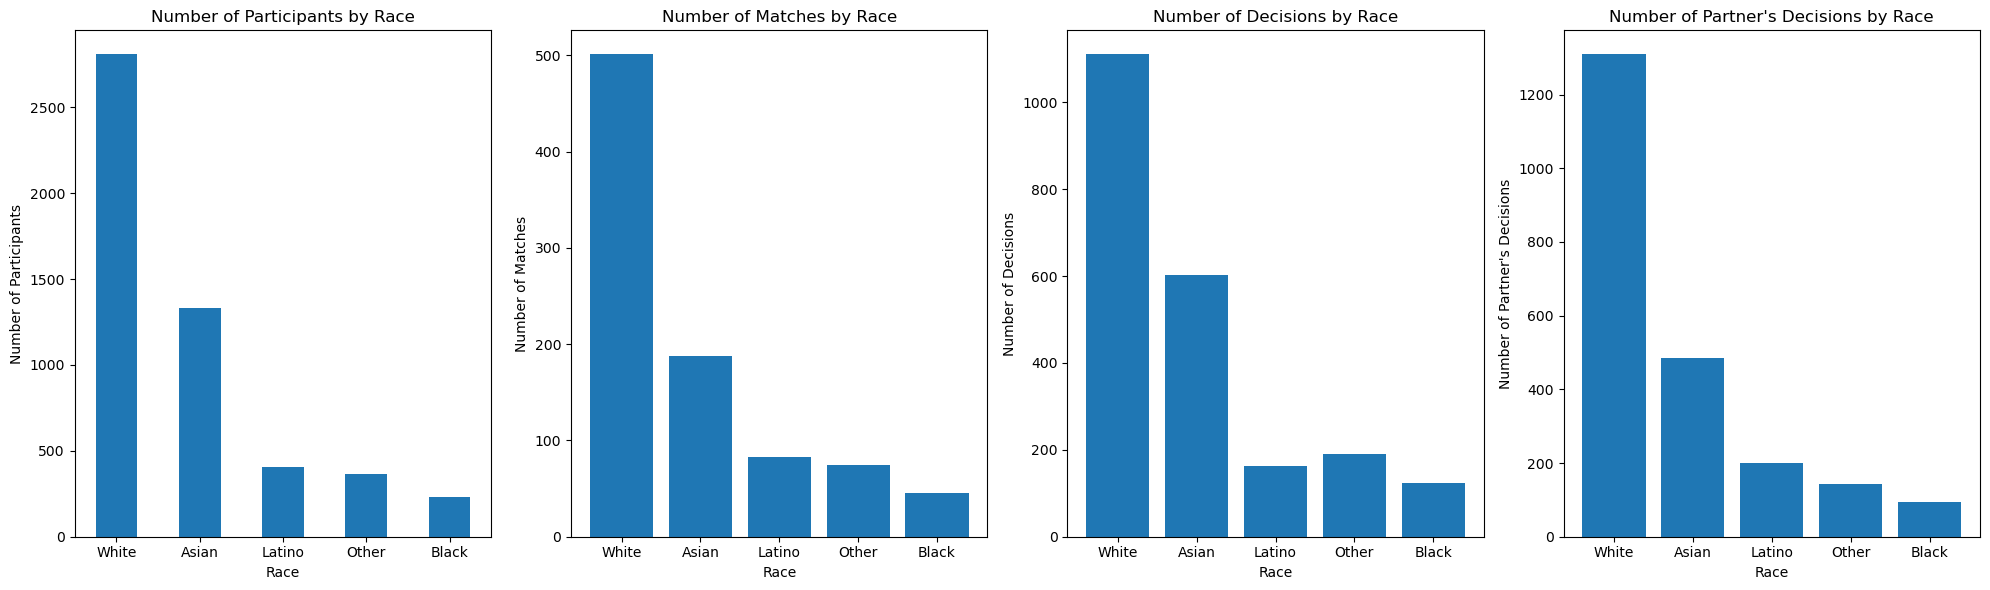

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Plot the number of participants by race
original.race.value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Race')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0)
axs[0].set_ylabel('Number of Participants')
axs[0].set_title('Number of Participants by Race')

# Plot the number of matches for each race
races = ['White', 'Asian', 'Latino', 'Other', 'Black']
match_counts = [
    len(original[(original['race'] == 'White') & (original['match'] == 1)]),
    len(original[(original['race'] == 'Asian') & (original['match'] == 1)]),
    len(original[(original['race'] == 'Latino') & (original['match'] == 1)]),
    len(original[(original['race'] == 'Other') & (original['match'] == 1)]),
    len(original[(original['race'] == 'Black') & (original['match'] == 1)])
]

axs[1].bar(races, match_counts)
axs[1].set_xlabel('Race')
axs[1].set_ylabel('Number of Matches')
axs[1].set_title('Number of Matches by Race')

# Add bars for 'dec' and 'dec_o'
dec_counts_race = [
    len(original[(original['race'] == 'White') & (original['dec'] == 1)]),
    len(original[(original['race'] == 'Asian') & (original['dec'] == 1)]),
    len(original[(original['race'] == 'Latino') & (original['dec'] == 1)]),
    len(original[(original['race'] == 'Other') & (original['dec'] == 1)]),
    len(original[(original['race'] == 'Black') & (original['dec'] == 1)])
]

dec_o_counts_race = [
    len(original[(original['race'] == 'White') & (original['dec_o'] == 1)]),
    len(original[(original['race'] == 'Asian') & (original['dec_o'] == 1)]),
    len(original[(original['race'] == 'Latino') & (original['dec_o'] == 1)]),
    len(original[(original['race'] == 'Other') & (original['dec_o'] == 1)]),
    len(original[(original['race'] == 'Black') & (original['dec_o'] == 1)])
]

axs[2].bar(races, dec_counts_race, label='Decision')
axs[2].set_xlabel('Race')
axs[2].set_ylabel('Number of Decisions')
axs[2].set_title('Number of Decisions by Race')

axs[3].bar(races, dec_o_counts_race, label='Partner\'s Decision')
axs[3].set_xlabel('Race')
axs[3].set_ylabel('Number of Partner\'s Decisions')
axs[3].set_title('Number of Partner\'s Decisions by Race')

plt.tight_layout()
plt.show()


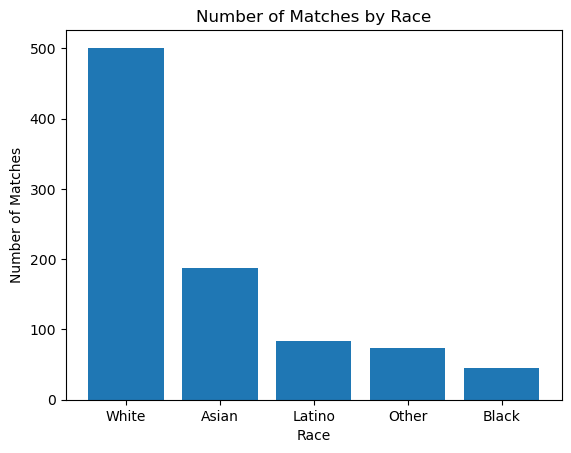

In [20]:
races = ['White', 'Asian', 'Latino', 'Other', 'Black']
match_counts = [
    len(original[(original['race'] == 'White') & (original['match'] == 1)]),
    len(original[(original['race'] == 'Asian') & (original['match'] == 1)]),
    len(original[(original['race'] == 'Latino') & (original['match'] == 1)]),
    len(original[(original['race'] == 'Other') & (original['match'] == 1)]),
    len(original[(original['race'] == 'Black') & (original['match'] == 1)])
]
plt.bar(races, match_counts)
plt.xlabel('Race')
plt.ylabel('Number of Matches')
plt.title('Number of Matches by Race')
plt.show()

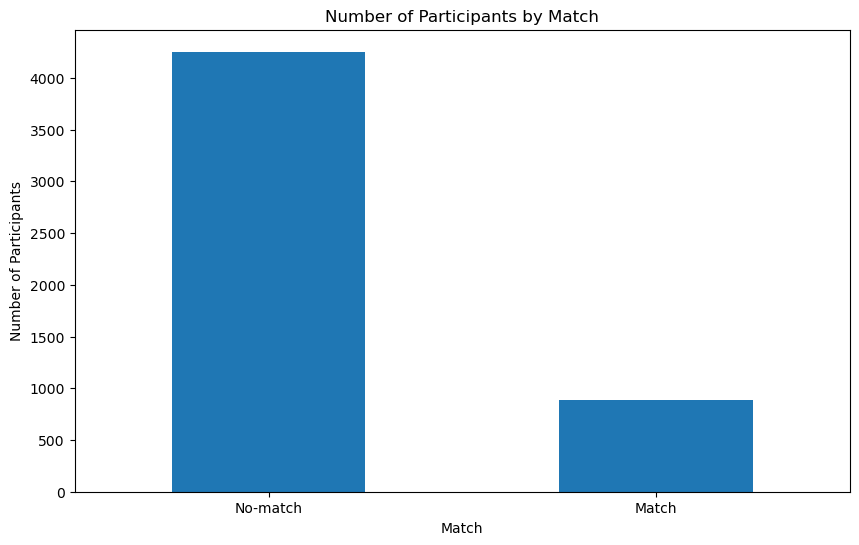

In [21]:
plt.figure(figsize=(10, 6))
original.match.value_counts().plot(kind='bar')
plt.xlabel('Match')
plt.ylabel('Number of Participants')
plt.xticks([0, 1], ['No-match', 'Match'])
plt.xticks(rotation=0)
plt.title('Number of Participants by Match')
plt.show()

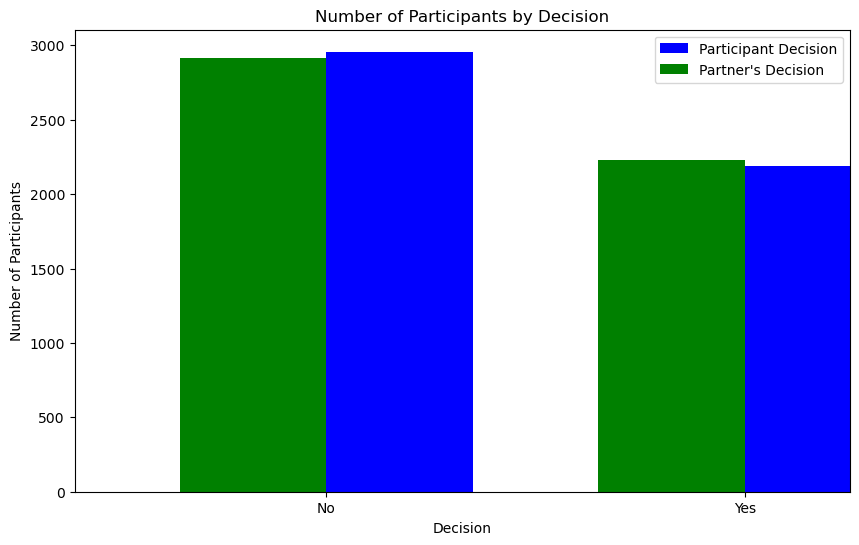

In [22]:
plt.figure(figsize=(10, 6))
width = 0.35

original.dec.value_counts().plot(kind='bar', position=0, width=width, label='Participant Decision', color='blue')
original.dec_o.value_counts().plot(kind='bar', position=1, width=width, label='Partner\'s Decision', color='green')

plt.xlabel('Decision')
plt.ylabel('Number of Participants')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.title('Number of Participants by Decision')
plt.legend()
plt.show()

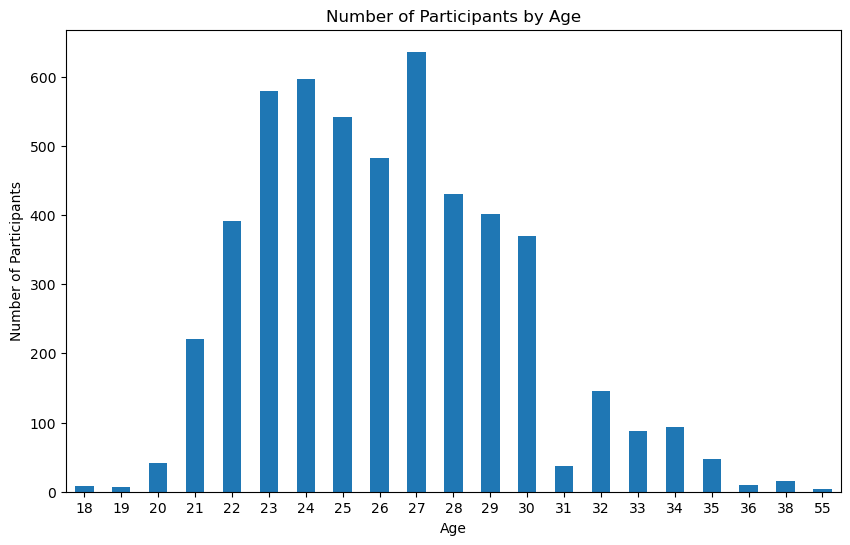

In [23]:
age_counts = original['age'].value_counts().sort_index(ascending=True)
age_labels = [str(int(age)) for age in age_counts.index]
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.xticks(ticks=range(len(age_counts)), labels=age_labels, rotation=0)
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.title('Number of Participants by Age')
plt.show()

# Data Predictions/Machine Learning Models

In [24]:
# post-analysis cleaning

# convert string gender back into values
reversed_gender_key = {value: key for key, value in gender_key.items()}
gender.replace(reversed_gender_key, inplace=True)

# one hot encodings
original = pd.get_dummies(original)

## Seperate the training and test data

In [25]:
# seperate train and test data
features = original.drop(['dec', 'dec_o', 'match'], axis=1)
target = original[['dec', 'dec_o', 'match']]

X_train, X_test, match_y_train, match_y_test = train_test_split(features, target['match'], test_size=0.2, random_state=42)
X_train, X_test, dec_y_train, dec_y_test = train_test_split(features, target['dec'], test_size=0.2, random_state=42)
X_train, X_test, dec_o_y_train, dec_o_y_test = train_test_split(features, target['dec_o'], test_size=0.2, random_state=42)

## Decision Tree

In [26]:
# A decision tree for each of the three targets
match_decision_tree = tree.DecisionTreeClassifier(max_depth = 7)
match_decision_tree.fit(X_train, match_y_train)
match_DT_pred = match_decision_tree.predict(X_test)
match_DT_scores = match_decision_tree.predict_proba(X_test)[:, 1]

dec_decision_tree = tree.DecisionTreeClassifier(max_depth = 5)
dec_decision_tree.fit(X_train, dec_y_train)
dec_DT_pred = dec_decision_tree.predict(X_test)
dec_DT_scores = dec_decision_tree.predict_proba(X_test)[:, 1]

dec_o_decision_tree = tree.DecisionTreeClassifier(max_depth = 7)
dec_o_decision_tree.fit(X_train, dec_o_y_train)
dec_o_DT_pred = dec_o_decision_tree.predict(X_test)
dec_o_DT_scores = dec_o_decision_tree.predict_proba(X_test)[:, 1]

In [27]:
# Testing accuracy for decision tree of all three targets
match_decision_tree_test = round(match_decision_tree.score(X_test, match_y_test) * 100, 2)

dec_decision_tree_test = round(dec_decision_tree.score(X_test, dec_y_test) * 100, 2)

dec_o_decision_tree_test = round(dec_o_decision_tree.score(X_test, dec_o_y_test) * 100, 2)

print("Decision Tree accuracy for match(both decided yes): ", match_decision_tree_test, "%")
print("Decision Tree accuracy for decision of participant: ", dec_decision_tree_test, "%")
print("Decision Tree accuracy for decision of partner:     ", dec_o_decision_tree_test, "%")

Decision Tree accuracy for match(both decided yes):  83.87 %
Decision Tree accuracy for decision of participant:  77.16 %
Decision Tree accuracy for decision of partner:      75.61 %


## Random Forest

In [28]:
# A random forest for each of the three targets
match_random_forest = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=1)
match_random_forest.fit(X_train, match_y_train)
match_RF_pred = match_random_forest.predict(X_test)
match_RF_scores = match_random_forest.predict_proba(X_test)[:, 1]

dec_random_forest = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=1)
dec_random_forest.fit(X_train, dec_y_train)
dec_RF_pred = dec_random_forest.predict(X_test)
dec_RF_scores = dec_random_forest.predict_proba(X_test)[:, 1]

dec_o_random_forest = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=1)
dec_o_random_forest.fit(X_train, dec_o_y_train)
dec_o_RF_pred = dec_o_random_forest.predict(X_test)
dec_o_RF_scores = dec_o_random_forest.predict_proba(X_test)[:, 1]


In [29]:
match_forest_test = round(match_random_forest.score(X_test, match_y_test) * 100, 2)

dec_forest_test = round(dec_random_forest.score(X_test, dec_y_test) * 100, 2)

dec_o_forest_test = round(dec_o_random_forest.score(X_test, dec_o_y_test) * 100, 2)

print("Random Forest accuracy for match(both decided yes): ", match_forest_test, "%")
print("Random Forest accuracy for decision of participant: ", dec_forest_test, "%")
print("Random Forest accuracy for decision of partner:     ", dec_o_forest_test, "%")

Random Forest accuracy for match(both decided yes):  84.65 %
Random Forest accuracy for decision of participant:  80.95 %
Random Forest accuracy for decision of partner:      78.04 %


## Logistic Regression

In [30]:
# create our logistic regression model and fit it to the training data
match_cls = linear_model.LogisticRegression(max_iter=1000)
match_cls.fit(X_train, match_y_train)
match_cls_pred = match_cls.predict(X_test)
match_cls_scores = match_cls.predict_proba(X_test)[:, 1]

dec_cls = linear_model.LogisticRegression(max_iter=1000)
dec_cls.fit(X_train, dec_y_train)
dec_cls_pred = dec_cls.predict(X_test)
dec_cls_scores = dec_cls.predict_proba(X_test)[:, 1]

dec_o_cls = linear_model.LogisticRegression(max_iter=1000)
dec_o_cls.fit(X_train, dec_o_y_train)
dec_o_cls_pred = dec_o_cls.predict(X_test)
dec_o_cls_scores = dec_o_cls.predict_proba(X_test)[:, 1]

c:\Users\joshs\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\joshs\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [31]:
# make our predictions and get our score
match_cls_test = round(match_cls.score(X_test, match_y_test) * 100, 2)
dec_cls_test = round(dec_cls.score(X_test, dec_y_test) * 100, 2)
dec_o_cls_test = round(dec_o_cls.score(X_test, dec_o_y_test) * 100, 2)

print("Logistic Regression accuracy for match(both decided yes): ", match_cls_test, "%")
print("Logistic Regression accuracy for decision of participant: ", dec_cls_test, "%")
print("Logistic Regression accuracy for decision of partner:     ", dec_o_cls_test, "%")

Logistic Regression accuracy for match(both decided yes):  84.16 %
Logistic Regression accuracy for decision of participant:  78.33 %
Logistic Regression accuracy for decision of partner:      78.04 %


## K Nearest Neighbor

In [32]:
# A K Nearest Neighbor model for each of the three targets
match_knn = KNeighborsClassifier(n_neighbors=4)
match_knn.fit(X_train, match_y_train)
match_knn_pred = match_knn.predict(X_test)
match_knn_scores = match_knn.predict_proba(X_test)[:, 1]

dec_knn = KNeighborsClassifier(n_neighbors=5)
dec_knn.fit(X_train, dec_y_train)
dec_knn_pred = dec_knn.predict(X_test)
dec_knn_scores = dec_knn.predict_proba(X_test)[:, 1]

dec_o_knn = KNeighborsClassifier(n_neighbors=4)
dec_o_knn.fit(X_train, dec_o_y_train)
dec_o_knn_pred = dec_o_knn.predict(X_test)
dec_o_knn_scores = dec_o_knn.predict_proba(X_test)[:, 1]

In [33]:
match_knn_test = round(match_knn.score(X_test, match_y_test) * 100, 2)

dec_knn_test = round(dec_knn.score(X_test, dec_y_test) * 100, 2)

dec_o_knn_test = round(dec_o_knn.score(X_test, dec_o_y_test) * 100, 2)

print("K-Nearest Neighbors accuracy for match(both decided yes): ", match_knn_test, "%")
print("K-Nearest Neighbors accuracy for decision of participant: ", dec_knn_test, "%")
print("K-Nearest Neighbors accuracy for decision of partner:     ", dec_o_knn_test, "%")

K-Nearest Neighbors accuracy for match(both decided yes):  81.05 %
K-Nearest Neighbors accuracy for decision of participant:  66.08 %
K-Nearest Neighbors accuracy for decision of partner:      66.38 %


## Naive Bayes Model

In [34]:
# A Naive Bayes model for each of the three targets
match_bayes = GaussianNB()
match_bayes.fit(X_train, match_y_train)
match_NB_pred = match_bayes.predict(X_test)
match_NB_scores = match_bayes.predict_proba(X_test)[:, 1]

dec_bayes = GaussianNB()
dec_bayes.fit(X_train, dec_y_train)
dec_NB_pred = dec_bayes.predict(X_test)
dec_NB_scores = match_bayes.predict_proba(X_test)[:, 1]

dec_o_bayes = GaussianNB()
dec_o_bayes.fit(X_train, dec_o_y_train)
dec_o_NB_pred = dec_o_bayes.predict(X_test)
dec_o_NB_scores = dec_o_bayes.predict_proba(X_test)[:, 1]

In [35]:
match_bayes_test = round(match_bayes.score(X_test, match_y_test) * 100, 2)

dec_bayes_test = round(dec_bayes.score(X_test, dec_y_test) * 100, 2)

dec_o_bayes_test = round(dec_o_bayes.score(X_test, dec_o_y_test) * 100, 2)

print("Naive Bayes Model accuracy for match(both decided yes): ", match_bayes_test, "%")
print("Naive Bayes Model accuracy for decision of participant: ", dec_bayes_test, "%")
print("Naive Bayes Model accuracy for decision of partner:     ", dec_o_bayes_test, "%")

Naive Bayes Model accuracy for match(both decided yes):  77.84 %
Naive Bayes Model accuracy for decision of participant:  73.86 %
Naive Bayes Model accuracy for decision of partner:      71.72 %


## ADABoost Model

In [36]:
# An ADABoost model for each of the three targets
match_adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
match_adaboost.fit(X_train, match_y_train)
match_adaboost_pred = match_adaboost.predict(X_test)
match_adaboost_scores = match_adaboost.predict_proba(X_test)[:, 1]

dec_adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
dec_adaboost.fit(X_train, dec_y_train)
dec_adaboost_pred = dec_adaboost.predict(X_test)
dec_adaboost_scores = dec_adaboost.predict_proba(X_test)[:, 1]

dec_o_adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
dec_o_adaboost.fit(X_train, dec_o_y_train)
dec_o_adaboost_pred = dec_o_adaboost.predict(X_test)
dec_o_adaboost_scores = dec_o_adaboost.predict_proba(X_test)[:, 1]

c:\Users\joshs\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\joshs\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\joshs\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [37]:
match_adaboost_test = round(match_adaboost.score(X_test, match_y_test) * 100, 2)

dec_adaboost_test = round(dec_adaboost.score(X_test, dec_y_test) * 100, 2)

dec_o_adaboost_test = round(dec_o_adaboost.score(X_test, dec_o_y_test) * 100, 2)

print("AdaBoost Model accuracy for match(both decided yes): ", match_adaboost_test, "%")
print("AdaBoost Model accuracy for decision of participant: ", dec_adaboost_test, "%")
print("AdaBoost Model accuracy for decision of partner:     ", dec_o_adaboost_test, "%")

AdaBoost Model accuracy for match(both decided yes):  86.01 %
AdaBoost Model accuracy for decision of participant:  80.17 %
AdaBoost Model accuracy for decision of partner:      77.84 %


# Assessing Fairness in the Models

## Independence

In [38]:
# Create functions to assess the independence fairness of a model for match, dec, and dec_o predictions

# If rates are within epsilon of each other, the model passes independence
epsilon = 0.2

def positive_rate(prediction):
    return sum(prediction) / len(prediction)

def negative_rate(prediction):
    return 1 - positive_rate(prediction)

races = ['Black', 'White', 'Latino', 'Asian', 'Other']
def race_rate(data, match_pred, dec_pred, dec_o_pred, func):
    df = pd.DataFrame(index=['Overall'] + races + ['Passes Independence'], columns=['Match', 'Decision', 'Partner Decision'])
    df.loc['Overall', 'Match'] = func(match_pred)
    df.loc['Overall', 'Decision'] = func(dec_pred)
    df.loc['Overall', 'Partner Decision'] = func(dec_o_pred)
    min_match = float('inf')
    min_dec = float('inf')
    min_dec_o = float('inf')
    max_match = float('-inf')
    max_dec = float('-inf')
    max_dec_o = float('-inf')
    for race in races:
        if 'race_' + race not in data:
            continue
        df.loc[race, 'Match'] = func(match_pred[data['race_' + race]])
        if df.loc[race, 'Match'] < min_match:
            min_match = df.loc[race, 'Match']
        if df.loc[race, 'Match'] > max_match:
            max_match = df.loc[race, 'Match']
        df.loc[race, 'Decision'] = func(dec_pred[data['race_' + race]])
        if df.loc[race, 'Decision'] < min_dec:
            min_dec = df.loc[race, 'Decision']
        if df.loc[race, 'Decision'] > max_dec:
            max_dec = df.loc[race, 'Decision']
        df.loc[race, 'Partner Decision'] = func(dec_o_pred[data['race_' + race]])
        if df.loc[race, 'Partner Decision'] < min_dec_o:
            min_dec_o = df.loc[race, 'Partner Decision']
        if df.loc[race, 'Partner Decision'] > max_dec_o:
            max_dec_o = df.loc[race, 'Partner Decision']
    if max_match / min_match - 1 > epsilon:
        df.loc['Passes Independence', 'Match'] = 'Fail'
    else:
        df.loc['Passes Independence', 'Match'] = 'Pass'
    if max_dec / min_dec - 1  > epsilon:
        df.loc['Passes Independence', 'Decision'] = 'Fail'
    else:
        df.loc['Passes Independence', 'Decision'] = 'Pass'
    if max_dec_o / min_dec_o - 1  > epsilon:
        df.loc['Passes Independence', 'Partner Decision'] = 'Fail'
    else:
        df.loc['Passes Independence', 'Partner Decision'] = 'Pass'
    return df

def race_rates_all(name, data, match_pred, dec_pred, dec_o_pred):
    positive_rates = race_rate(data, match_pred, dec_pred, dec_o_pred, positive_rate)
    negative_rates = race_rate(data, match_pred, dec_pred, dec_o_pred, negative_rate)
    print(f"\n{name} Predicted Positive Rates")
    print(positive_rates)
    print(f"\n{name} Predicted Negative Rates")
    print(negative_rates)


In [39]:
race_rates_all("Decision Tree", X_test, match_DT_pred, dec_DT_pred, dec_o_DT_pred)
race_rates_all("Random Forest", X_test, match_RF_pred, dec_RF_pred, dec_o_RF_pred)
race_rates_all("Logistic Regression", X_test, match_cls_pred, dec_cls_pred, dec_o_cls_pred)
race_rates_all("K Nearest Neighbors", X_test, match_knn_pred, dec_knn_pred, dec_o_knn_pred)
race_rates_all("Naive Bayes", X_test, match_NB_pred, dec_NB_pred, dec_o_NB_pred)
race_rates_all("ADABoost", X_test, match_adaboost_pred, dec_adaboost_pred, dec_o_adaboost_pred)


Decision Tree Predicted Positive Rates
                        Match  Decision Partner Decision
Overall              0.115646  0.442177         0.396501
Black                0.188679  0.490566         0.415094
White                0.126606  0.440367         0.412844
Latino               0.144737  0.381579         0.473684
Asian                0.078014  0.464539         0.361702
Other                 0.09589   0.39726         0.315068
Passes Independence      Fail      Fail             Fail

Decision Tree Predicted Negative Rates
                        Match  Decision Partner Decision
Overall              0.884354  0.557823         0.603499
Black                0.811321  0.509434         0.584906
White                0.873394  0.559633         0.587156
Latino               0.855263  0.618421         0.526316
Asian                0.921986  0.535461         0.638298
Other                 0.90411   0.60274         0.684932
Passes Independence      Pass      Fail             Fail

Random 

C:\Users\joshs\AppData\Local\Temp\ipykernel_16532\2315454097.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  if max_match / min_match - 1 > epsilon:


## Separation

In [40]:
# Create functions to assess the separation fairness of a model for match, dec, and dec_o predictions

# If rates are within epsilon of each other, the model passes separation
epsilon = 0.3

def false_negative_one(prediction, target):
    confusion_matrix = metrics.confusion_matrix(target, prediction)
    return confusion_matrix[1,0] / (confusion_matrix[1,0] + confusion_matrix[1,1])

def false_positive_one(prediction, target):
    confusion_matrix = metrics.confusion_matrix(target, prediction)
    return confusion_matrix[0,1] / (confusion_matrix[0,1] + confusion_matrix[0,0])

races = ['Black', 'White', 'Latino', 'Asian', 'Other']
def race_rate(data, match_pred, dec_pred, dec_o_pred, match_target, dec_target, dec_o_target, func):
    df = pd.DataFrame(index=['Overall'] + races + ['Passes Separation'], columns=['Match', 'Decision', 'Partner Decision'])
    df.loc['Overall', 'Match'] = func(match_pred, match_target)
    df.loc['Overall', 'Decision'] = func(dec_pred, dec_target)
    df.loc['Overall', 'Partner Decision'] = func(dec_o_pred, dec_o_target)
    min_match = float('inf')
    min_dec = float('inf')
    min_dec_o = float('inf')
    max_match = float('-inf')
    max_dec = float('-inf')
    max_dec_o = float('-inf')
    for race in races:
        if 'race_' + race not in data:
            continue
        df.loc[race, 'Match'] = func(match_pred[data['race_' + race]], match_target[data['race_' + race]])
        if df.loc[race, 'Match'] < min_match:
            min_match = df.loc[race, 'Match']
        if df.loc[race, 'Match'] > max_match:
            max_match = df.loc[race, 'Match']
        df.loc[race, 'Decision'] = func(dec_pred[data['race_' + race]], dec_target[data['race_' + race]])
        if df.loc[race, 'Decision'] < min_dec:
            min_dec = df.loc[race, 'Decision']
        if df.loc[race, 'Decision'] > max_dec:
            max_dec = df.loc[race, 'Decision']
        df.loc[race, 'Partner Decision'] = func(dec_o_pred[data['race_' + race]], dec_o_target[data['race_' + race]])
        if df.loc[race, 'Partner Decision'] < min_dec_o:
            min_dec_o = df.loc[race, 'Partner Decision']
        if df.loc[race, 'Partner Decision'] > max_dec_o:
            max_dec_o = df.loc[race, 'Partner Decision']
    diff = max_match / min_match - 1
    if  diff > epsilon:
        df.loc['Passes Separation', 'Match'] = f'Fail ({diff * 100:.2f}%)'
    else:
        df.loc['Passes Separation', 'Match'] = f'Pass ({diff * 100:.2f}%)'
    diff = max_dec / min_dec - 1
    if  diff > epsilon:
        df.loc['Passes Separation', 'Decision'] = f'Fail ({diff * 100:.2f}%)'
    else:
        df.loc['Passes Separation', 'Decision'] = f'Pass ({diff * 100:.2f}%)'
    diff = max_dec_o / min_dec_o - 1
    if  diff > epsilon:
        df.loc['Passes Separation', 'Partner Decision'] = f'Fail ({diff * 100:.2f}%)'
    else:
        df.loc['Passes Separation', 'Partner Decision'] = f'Pass ({diff * 100:.2f}%)'
    return df

def race_rates_all(name, data, match_pred, dec_pred, dec_o_pred, match_target, dec_target, dec_o_target):
    positive_rates = race_rate(data, match_pred, dec_pred, dec_o_pred, match_target, dec_target, dec_o_target, false_positive_one)
    negative_rates = race_rate(data, match_pred, dec_pred, dec_o_pred, match_target, dec_target, dec_o_target, false_negative_one)
    print(f"\n{name} False Positive Rates")
    print(positive_rates)
    print(f"\n{name} False Negative Rates")
    print(negative_rates)

In [41]:
race_rates_all("Decision Tree", X_test, match_DT_pred, dec_DT_pred, dec_o_DT_pred, match_y_test, dec_y_test, dec_o_y_test)
race_rates_all("Random Forest", X_test, match_RF_pred, dec_RF_pred, dec_o_RF_pred, match_y_test, dec_y_test, dec_o_y_test)
race_rates_all("Logistic Regression", X_test, match_cls_pred, dec_cls_pred, dec_o_cls_pred, match_y_test, dec_y_test, dec_o_y_test)
race_rates_all("K Nearest Neighbors", X_test, match_knn_pred, dec_knn_pred, dec_o_knn_pred, match_y_test, dec_y_test, dec_o_y_test)
race_rates_all("Naive Bayes", X_test, match_NB_pred, dec_NB_pred, dec_o_NB_pred, match_y_test, dec_y_test, dec_o_y_test)
race_rates_all("ADABoost", X_test, match_adaboost_pred, dec_adaboost_pred, dec_o_adaboost_pred, match_y_test, dec_y_test, dec_o_y_test)


Decision Tree False Positive Rates
                           Match        Decision Partner Decision
Overall                 0.059242        0.192377         0.196721
Black                   0.076923             0.2         0.285714
White                   0.061927        0.178218         0.189369
Latino                  0.080645        0.095238         0.272727
Asian                    0.04878        0.243056          0.18617
Other                    0.04918        0.216216         0.163265
Passes Separation  Fail (65.32%)  Fail (155.21%)    Fail (75.00%)

Decision Tree False Negative Rates
                           Match       Decision Partner Decision
Overall                 0.627027       0.269874         0.312649
Black                        0.5           0.25             0.44
White                   0.614679       0.231405         0.311475
Latino                  0.571429       0.264706             0.25
Asian                   0.722222       0.304348         0.287234
Other     

C:\Users\joshs\AppData\Local\Temp\ipykernel_16532\3122207717.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  diff = max_match / min_match - 1



K Nearest Neighbors False Positive Rates
                         Match       Decision Partner Decision
Overall               0.028436       0.235935          0.17377
Black                      0.0           0.28         0.214286
White                 0.022936       0.227723         0.186047
Latino                0.048387       0.214286             0.25
Asian                 0.044715       0.243056         0.159574
Other                      0.0        0.27027         0.061224
Passes Separation  Fail (inf%)  Fail (30.67%)   Fail (308.33%)

K Nearest Neighbors False Negative Rates
                           Match       Decision Partner Decision
Overall                 0.924324       0.458159         0.572792
Black                        1.0       0.392857             0.56
White                   0.899083            0.5         0.540984
Latino                  0.928571       0.588235          0.53125
Asian                   0.944444       0.391304         0.648936
Other                 

In [52]:
def ROCPlotter(title, match_score, dec_score, dec_o_score):
    fig, axs = plt.subplots(2, 3, figsize=(10, 6))  # Adjust the number of subplots for the additional ROC curve

    md = {'target': match_y_test, 'score': match_score, 'gender': X_test['gender'], 'race': X_test['race_White']}
    match_marginals = pd.DataFrame(data=md)

    dd = {'target': dec_y_test, 'score': dec_score, 'gender': X_test['gender'], 'race': X_test['race_White']}
    dec_marginals = pd.DataFrame(data=dd)

    dod = {'target': dec_o_y_test, 'score': dec_o_score, 'gender': X_test['gender'], 'race': X_test['race_White']}
    dec_o_marginals = pd.DataFrame(data=dod)

    for genders in [1, 0]:
        # Extract marginals for the current gender
        match_marginals_gender = match_marginals[match_marginals['gender'] == genders].reset_index(drop=True)
        dec_marginals_gender = dec_marginals[dec_marginals['gender'] == genders].reset_index(drop=True)
        dec_o_marginals_gender = dec_o_marginals[dec_o_marginals['gender'] == genders].reset_index(drop=True)

        # Extract true labels for the current gender
        match_true_gender = match_marginals_gender['target']
        dec_true_gender = dec_marginals_gender['target']
        dec_o_true_gender = dec_o_marginals_gender['target']

        # Calculate ROC curve and AUC for each set of predictions
        fpr_match, tpr_match, _ = roc_curve(match_true_gender, match_marginals_gender['score'])
        roc_auc_match = auc(fpr_match, tpr_match)

        fpr_dec, tpr_dec, _ = roc_curve(dec_true_gender, dec_marginals_gender['score'])
        roc_auc_dec = auc(fpr_dec, tpr_dec)

        fpr_dec_o, tpr_dec_o, _ = roc_curve(dec_o_true_gender, dec_o_marginals_gender['score'])
        roc_auc_dec_o = auc(fpr_dec_o, tpr_dec_o)

        gender_string = 'Female' if genders == 0 else 'Male'

        axs[0,0].plot(fpr_match, tpr_match, label=f'{gender_string} AUC = {roc_auc_match:.2f}')
        axs[0,1].plot(fpr_dec, tpr_dec, label=f'{gender_string} AUC = {roc_auc_dec:.2f}')
        axs[0,2].plot(fpr_dec_o, tpr_dec_o, label=f'{gender_string} AUC = {roc_auc_dec_o:.2f}')

    for races in [1,0]:
            # Extract marginals for the current race
        match_marginals_race = match_marginals[match_marginals['race'] == races].reset_index(drop=True)
        dec_marginals_race = dec_marginals[dec_marginals['race'] == races].reset_index(drop=True)
        dec_o_marginals_race = dec_o_marginals[dec_o_marginals['race'] == races].reset_index(drop=True)

        # Extract true labels for the current race
        match_true_race = match_marginals_race['target']
        dec_true_race = dec_marginals_race['target']
        dec_o_true_race = dec_o_marginals_race['target']

        mfpr_race, mtpr_race, _ = roc_curve(match_true_race, match_marginals_race['score'])
        mroc_auc_race = auc(mfpr_race, mtpr_race)

        dfpr_race, dtpr_race, _ = roc_curve(dec_true_race, dec_marginals_race['score'])
        droc_auc_race = auc(dfpr_race, dtpr_race)

        dofpr_race, dotpr_race, _ = roc_curve(dec_o_true_race, dec_o_marginals_race['score'])
        doroc_auc_race = auc(dofpr_race, dotpr_race)

        race_string = 'White' if races == 1 else 'Non-White'

        axs[1,0].plot(mfpr_race, mtpr_race, label=f'{race_string} AUC = {mroc_auc_race:.2f}')
        axs[1,1].plot(dfpr_race, dtpr_race, label=f'{race_string} AUC = {droc_auc_race:.2f}')
        axs[1,2].plot(dofpr_race, dotpr_race, label=f'{race_string} AUC = {doroc_auc_race:.2f}')

    for row in axs:
        for ax in row:
            ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.legend(loc='lower right')

    axs[0,0].set_title(title + ' \nROC Curve - Match - Gender')
    axs[0,1].set_title(title + ' \nROC Curve - Decision - Gender')
    axs[0,2].set_title(title + " \nROC Curve - Partner's Decision - Gender")
    axs[1,0].set_title(title + " \nROC Curve - Match - Race")
    axs[1,1].set_title(title + " \nROC Curve - Decision - Race")
    axs[1,2].set_title(title + " \nROC Curve - Partner's Decision - Race")

    plt.tight_layout(rect=[0, 0, 1.15, 0.95])
    plt.show()

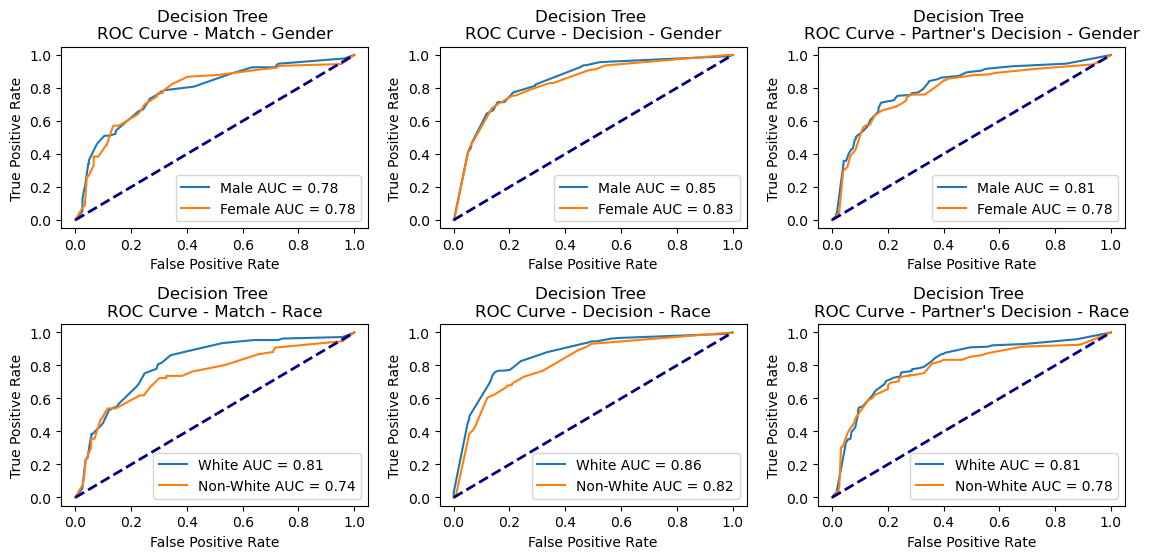

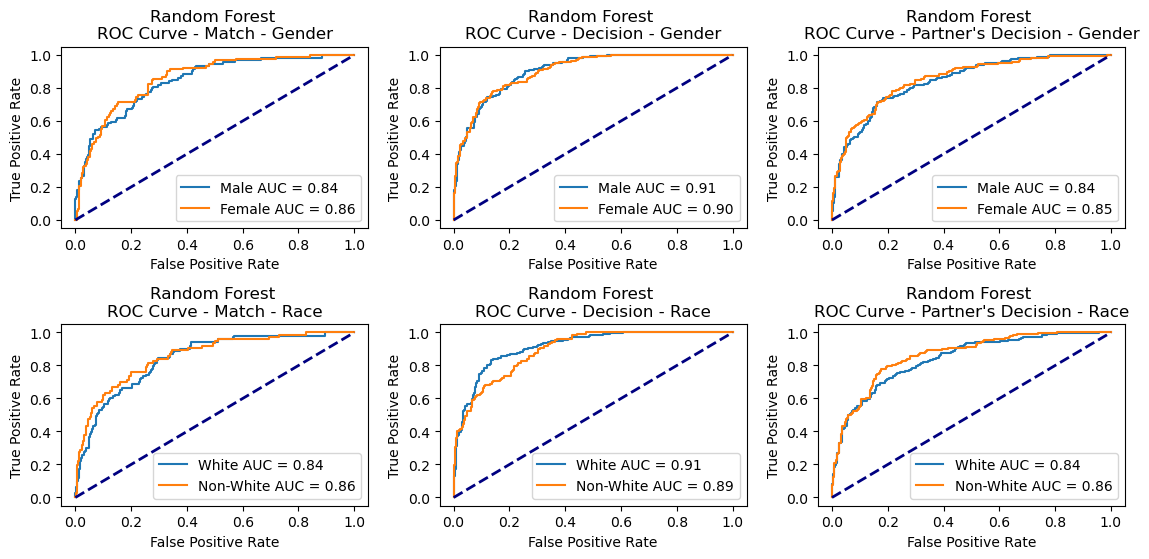

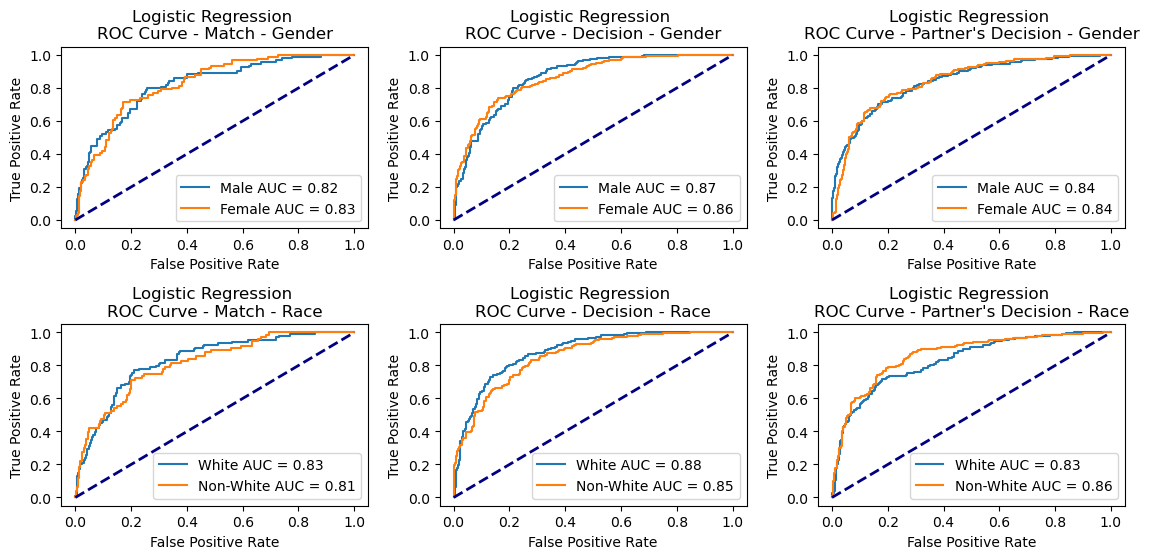

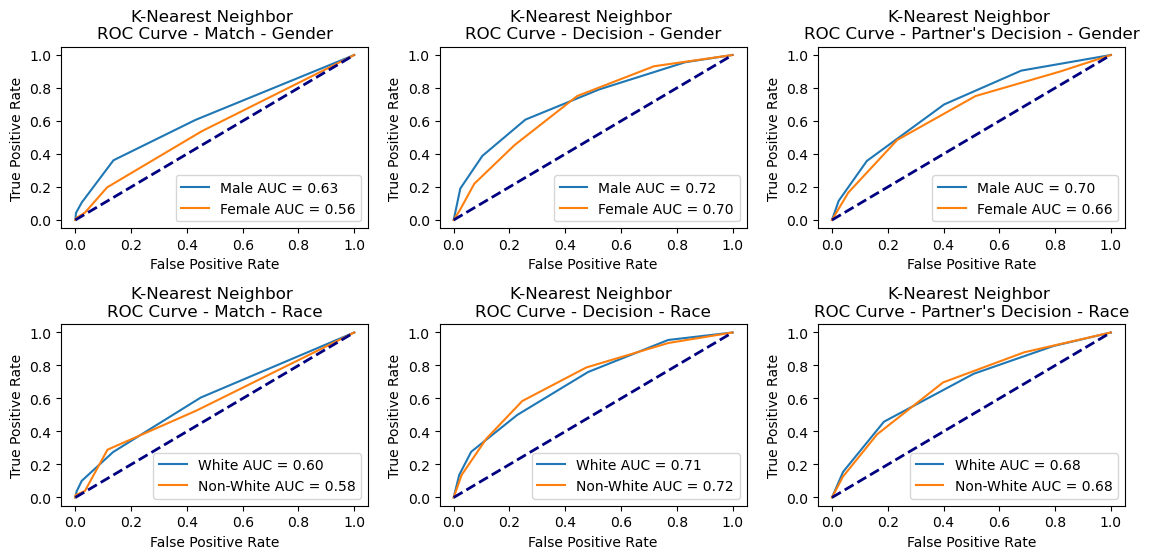

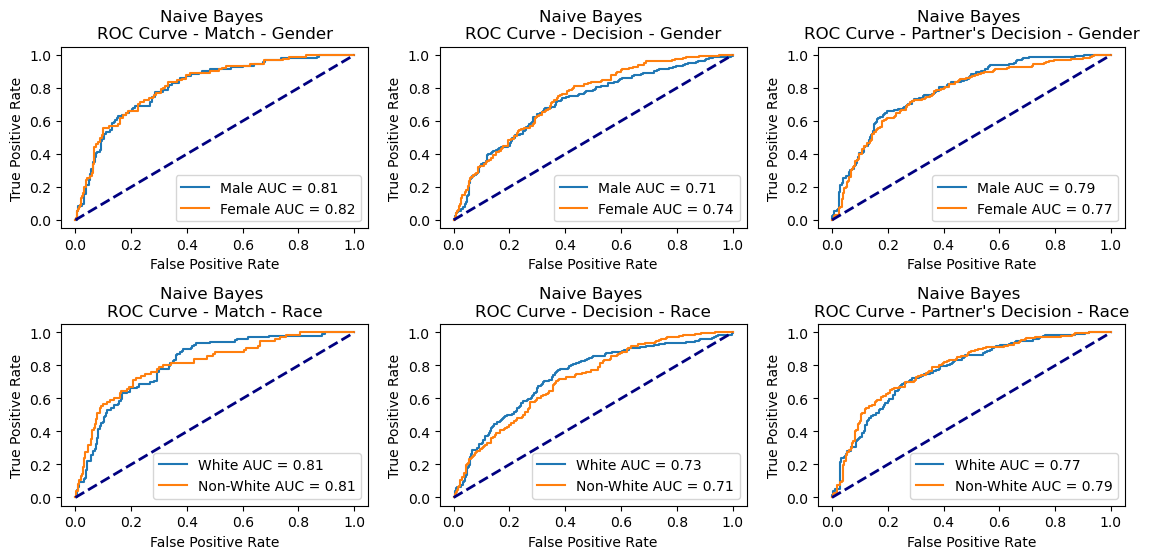

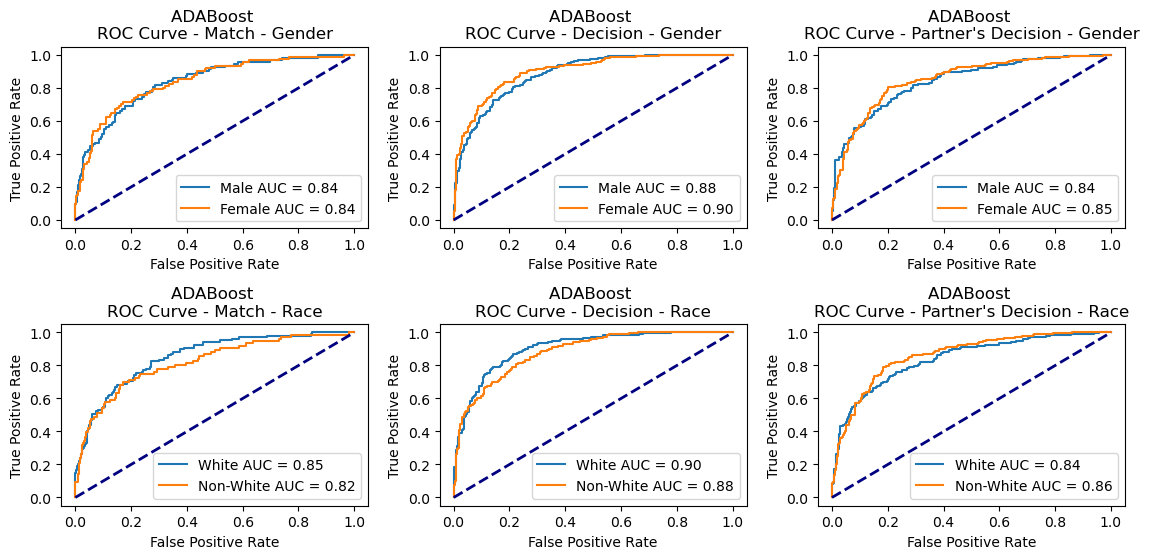

In [53]:
ROCPlotter("Decision Tree", match_DT_scores, dec_DT_scores, dec_o_DT_scores)
ROCPlotter("Random Forest", match_RF_scores, dec_RF_scores, dec_o_RF_scores)
ROCPlotter("Logistic Regression", match_cls_scores, dec_cls_scores, dec_o_cls_scores)
ROCPlotter("K-Nearest Neighbor", match_knn_scores, dec_knn_scores, dec_o_knn_scores)
ROCPlotter("Naive Bayes", match_NB_scores, dec_NB_scores, dec_o_NB_scores)
ROCPlotter("ADABoost", match_adaboost_scores, dec_adaboost_scores, dec_o_adaboost_scores)

## Sufficiency - Calibration by Group

In [ ]:
# Create function to calibrate plot

def calibration_plot_one(r, scores, target):
  # Create output array
  p = []
  # Loop through m - 1 values
  m = len(r)
  for i in range(m - 1):
    # Count number of entries within bounds and number of Y = 1
    lower_bound = r[i]
    upper_bound = r[i + 1]
    count_total = 0
    count_positive = 0
    for score, label in zip(scores, target):
      if lower_bound <= score < upper_bound:
        count_total += 1
        if label == 1:
          count_positive += 1
    # Must avoid divide by 0 errors
    if count_total > 0:
      p.append(count_positive / count_total)
    else:
      p.append(-1)
  return np.array(p)

def calibration_plot(r, match_scores, dec_scores, dec_o_scores, match_target, dec_target, dec_o_target):
  return (calibration_plot_one(r, match_scores, match_target),
          calibration_plot_one(r, dec_scores, dec_target),
          calibration_plot_one(r, dec_o_scores, dec_o_target))

def get_average_distance(p):
  sum = 0
  length = len(p)
  for i in range(len(p)):
    if p[i] != -1:
      sum += abs(p[i] - (i + 0.05) * 0.1)
    else:
      length -= 1
  return sum / length

def plot_calibration_gender(name, gender, match_scores, dec_scores, dec_o_scores, match_target, dec_target, dec_o_target):
  # Create calibration plot# Define the intervals for the calibration plot
  certainty = np.arange(0, 1.1, 0.1)

  # Calculate the calibration plot
  match_true_pos, dec_true_pos, dec_o_true_pos = \
    calibration_plot(certainty, match_scores, dec_scores, dec_o_scores,
                     match_target, dec_target, dec_o_target)
  f_match_true_pos, f_dec_true_pos, f_dec_o_true_pos = \
    calibration_plot(certainty, match_scores[gender == 0], dec_scores[gender == 0], dec_o_scores[gender == 0],
                     match_target[gender == 0], dec_target[gender == 0], dec_o_target[gender == 0])
  m_match_true_pos, m_dec_true_pos, m_dec_o_true_pos = \
    calibration_plot(certainty, match_scores[gender == 1], dec_scores[gender == 1], dec_o_scores[gender == 1],
                     match_target[gender == 1], dec_target[gender == 1], dec_o_target[gender == 1])

  # Increase r by 0.05 to match it with the center of the interval
  certainty += 0.05

  # Plot calibration plot
  fig, axs = plt.subplots(1, 3, figsize=(24, 6))

  # Print average distance from ideal calibration
  female_match_dist, male_match_dist = get_average_distance(f_match_true_pos), get_average_distance(m_match_true_pos)
  female_dec_dist, male_dec_dist = get_average_distance(f_dec_true_pos), get_average_distance(m_dec_true_pos)
  female_dec_o_dist, male_dec_o_dist = get_average_distance(f_dec_o_true_pos), get_average_distance(m_dec_o_true_pos)
  average_difference = abs(sum((female_match_dist - male_match_dist, female_dec_dist - male_dec_dist,
                           female_dec_o_dist - male_dec_o_dist))) / 3
  print(str(name) + " Average Female Match Distance to Ideal:", female_match_dist)
  print(str(name) + " Average Male Match Distance to Ideal:",  male_match_dist)
  print(str(name) + " Average Female Decision Distance to Ideal:", female_dec_dist)
  print(str(name) + " Average Male Decision Distance to Ideal:", male_dec_dist)
  print(str(name) + " Average Female Partner Decision Distance to Ideal:", female_dec_o_dist)
  print(str(name) + " Average Male Partner Decision Distance to Ideal:", male_dec_o_dist)
  print(str(name) + " Average Difference in Match Distance:", average_difference)

  # Plot the calibration plot on the three subplots
  #axs[0].plot(certainty[:-1][match_true_pos != -1], match_true_pos[match_true_pos != -1], marker='o', label='Overall Calibration')
  axs[0].plot(certainty[:-1][m_match_true_pos != -1], m_match_true_pos[m_match_true_pos != -1], marker='o', label=f'Male Calibration Avg Dist = {male_match_dist:.2f}')
  axs[0].plot(certainty[:-1][f_match_true_pos != -1], f_match_true_pos[f_match_true_pos != -1], marker='o', label=f'Female Calibration Avg Dist = {female_match_dist:.2f}')
  axs[0].plot([0, 1], [0, 1], "--k", label='Ideal Calibration')
  axs[0].set_xlabel('Certainty')
  axs[0].set_ylabel('True Positive Rate')
  axs[0].set_title(str(name) + ' Match Calibration Plot')
  axs[0].legend()
  axs[0].grid(True)
  
  #axs[1].plot(certainty[:-1][dec_true_pos != -1], dec_true_pos[dec_true_pos != -1], marker='o', label='Overall Calibration')
  axs[1].plot(certainty[:-1][m_dec_true_pos != -1], m_dec_true_pos[m_dec_true_pos != -1], marker='o', label=f'Male Calibration Avg Dist = {male_dec_dist:.2f}')
  axs[1].plot(certainty[:-1][f_dec_true_pos != -1], f_dec_true_pos[f_dec_true_pos != -1], marker='o', label=f'Female Calibration Avg Dist = {female_dec_dist:.2f}')
  axs[1].plot([0, 1], [0, 1], "--k", label='Ideal Calibration')
  axs[1].set_xlabel('Certainty')
  axs[1].set_ylabel('True Positive Rate')
  axs[1].set_title(str(name) + ' Decision Calibration Plot')
  axs[1].legend()
  axs[1].grid(True)
  
 # axs[2].plot(certainty[:-1][dec_o_true_pos != -1], dec_o_true_pos[dec_o_true_pos != -1], marker='o', label='Overall Calibration')
  axs[2].plot(certainty[:-1][m_dec_o_true_pos != -1], m_dec_o_true_pos[m_dec_o_true_pos != -1], marker='o', label=f'Male Calibration Avg Dist = {male_dec_o_dist:.2f}')
  axs[2].plot(certainty[:-1][f_dec_o_true_pos != -1], f_dec_o_true_pos[f_dec_o_true_pos != -1], marker='o', label=f'Female Calibration Avg Dist = {female_dec_o_dist:.2f}')
  axs[2].plot([0, 1], [0, 1], "--k", label='Ideal Calibration')
  axs[2].set_xlabel('Certainty')
  axs[2].set_ylabel('True Positive Rate')
  axs[2].set_title(str(name) + ' Partner\'s Decision Calibration Plot')
  axs[2].legend()
  axs[2].grid(True)

def plot_calibration_race(name, race, match_scores, dec_scores, dec_o_scores, match_target, dec_target, dec_o_target):
  # Create calibration plot# Define the intervals for the calibration plot
  certainty = np.arange(0, 1.1, 0.1)

  # Calculate the calibration plot
  w_match_true_pos, w_dec_true_pos, w_dec_o_true_pos = \
    calibration_plot(certainty, match_scores[race == 1], dec_scores[race == 1], dec_o_scores[race == 1],
                     match_target[race == 1], dec_target[race == 1], dec_o_target[race == 1])
  nw_match_true_pos, nw_dec_true_pos, nw_dec_o_true_pos = \
    calibration_plot(certainty, match_scores[race == 0], dec_scores[race == 0], dec_o_scores[race == 0],
                     match_target[race == 0], dec_target[race == 0], dec_o_target[race == 0])

  # Increase r by 0.05 to match it with the center of the interval
  certainty += 0.05

  # Plot calibration plot
  fig, axs = plt.subplots(1, 3, figsize=(24, 6))

  # Print average distance from ideal calibration
  w_match_dist, nw_match_dist = get_average_distance(w_match_true_pos), get_average_distance(nw_match_true_pos)
  w_dec_dist, nw_dec_dist = get_average_distance(w_dec_true_pos), get_average_distance(nw_dec_true_pos)
  w_dec_o_dist, nw_dec_o_dist = get_average_distance(w_dec_o_true_pos), get_average_distance(nw_dec_o_true_pos)
  match_dist = w_match_dist - nw_match_dist
  dec_dist = w_dec_dist - nw_dec_dist
  dec_o_dist = w_dec_o_dist - nw_dec_o_dist
  average_difference = abs(sum((match_dist, dec_dist, dec_o_dist)) / 3)
  print(str(name) + " Average White Match Distance to Ideal:", w_match_dist)
  print(str(name) + " Average Nonwhite Match Distance to Ideal:",  nw_match_dist)
  print(str(name) + " Average White Decision Distance to Ideal:", w_dec_dist)
  print(str(name) + " Average Nonwhite Decision Distance to Ideal:", nw_dec_dist)
  print(str(name) + " Average White Partner Decision Distance to Ideal:", w_dec_o_dist)
  print(str(name) + " Average Nonwhite Partner Decision Distance to Ideal:", nw_dec_o_dist)
  print(str(name) + " Average Difference in Match Distance:", average_difference)

  # Plot the calibration plot on the three subplots
  #axs[0].plot(certainty[:-1][match_true_pos != -1], match_true_pos[match_true_pos != -1], marker='o', label='Overall Calibration')
  axs[0].plot(certainty[:-1][w_match_true_pos != -1], w_match_true_pos[w_match_true_pos != -1], marker='o', label=f'White Calibration Avg Dist = {w_match_dist:.2f}')
  axs[0].plot(certainty[:-1][nw_match_true_pos != -1], nw_match_true_pos[nw_match_true_pos != -1], marker='o', label=f'Nonwhite Calibration Avg Dist = {nw_match_dist:.2f}')
  axs[0].plot([0, 1], [0, 1], "--k", label='Ideal Calibration')
  axs[0].set_xlabel('Certainty')
  axs[0].set_ylabel('True Positive Rate')
  axs[0].set_title(str(name) + ' Match Calibration Plot')
  axs[0].legend()
  axs[0].grid(True)
  
  #axs[1].plot(certainty[:-1][dec_true_pos != -1], dec_true_pos[dec_true_pos != -1], marker='o', label='Overall Calibration')
  axs[1].plot(certainty[:-1][w_dec_true_pos != -1], w_dec_true_pos[w_dec_true_pos != -1], marker='o', label=f'White Calibration Avg Dist = {w_dec_dist:.2f}')
  axs[1].plot(certainty[:-1][nw_dec_true_pos != -1], nw_dec_true_pos[nw_dec_true_pos != -1], marker='o', label=f'Nonwhite Calibration Avg Dist = {nw_dec_dist:.2f}')
  axs[1].plot([0, 1], [0, 1], "--k", label='Ideal Calibration')
  axs[1].set_xlabel('Certainty')
  axs[1].set_ylabel('True Positive Rate')
  axs[1].set_title(str(name) + ' Decision Calibration Plot')
  axs[1].legend()
  axs[1].grid(True)
  
 # axs[2].plot(certainty[:-1][dec_o_true_pos != -1], dec_o_true_pos[dec_o_true_pos != -1], marker='o', label='Overall Calibration')
  axs[2].plot(certainty[:-1][w_dec_o_true_pos != -1], w_dec_o_true_pos[w_dec_o_true_pos != -1], marker='o', label=f'White Calibration Avg Dist = {w_dec_o_dist:.2f}')
  axs[2].plot(certainty[:-1][nw_dec_o_true_pos != -1], nw_dec_o_true_pos[nw_dec_o_true_pos != -1], marker='o', label=f'Nonwhite Calibration Avg Dist = {nw_dec_o_dist:.2f}')
  axs[2].plot([0, 1], [0, 1], "--k", label='Ideal Calibration')
  axs[2].set_xlabel('Certainty')
  axs[2].set_ylabel('True Positive Rate')
  axs[2].set_title(str(name) + ' Partner\'s Decision Calibration Plot')
  axs[2].legend()
  axs[2].grid(True)

  # Display the plots
  plt.show()

Decision Tree - Average Female Match Distance to Ideal: 0.17106367509522552
Decision Tree - Average Male Match Distance to Ideal: 0.14427524122680718
Decision Tree - Average Female Decision Distance to Ideal: 0.08665787174472529
Decision Tree - Average Male Decision Distance to Ideal: 0.17616725232318042
Decision Tree - Average Female Partner Decision Distance to Ideal: 0.11103191906212255
Decision Tree - Average Male Partner Decision Distance to Ideal: 0.10494777763763126
Decision Tree - Average Difference in Match Distance: 0.018878935095181834
Random Forest - Average Female Match Distance to Ideal: 0.17744583267609582
Random Forest - Average Male Match Distance to Ideal: 0.15414558338310053
Random Forest - Average Female Decision Distance to Ideal: 0.10498416955136997
Random Forest - Average Male Decision Distance to Ideal: 0.1222975819489355
Random Forest - Average Female Partner Decision Distance to Ideal: 0.08397357853293921
Random Forest - Average Male Partner Decision Distance 

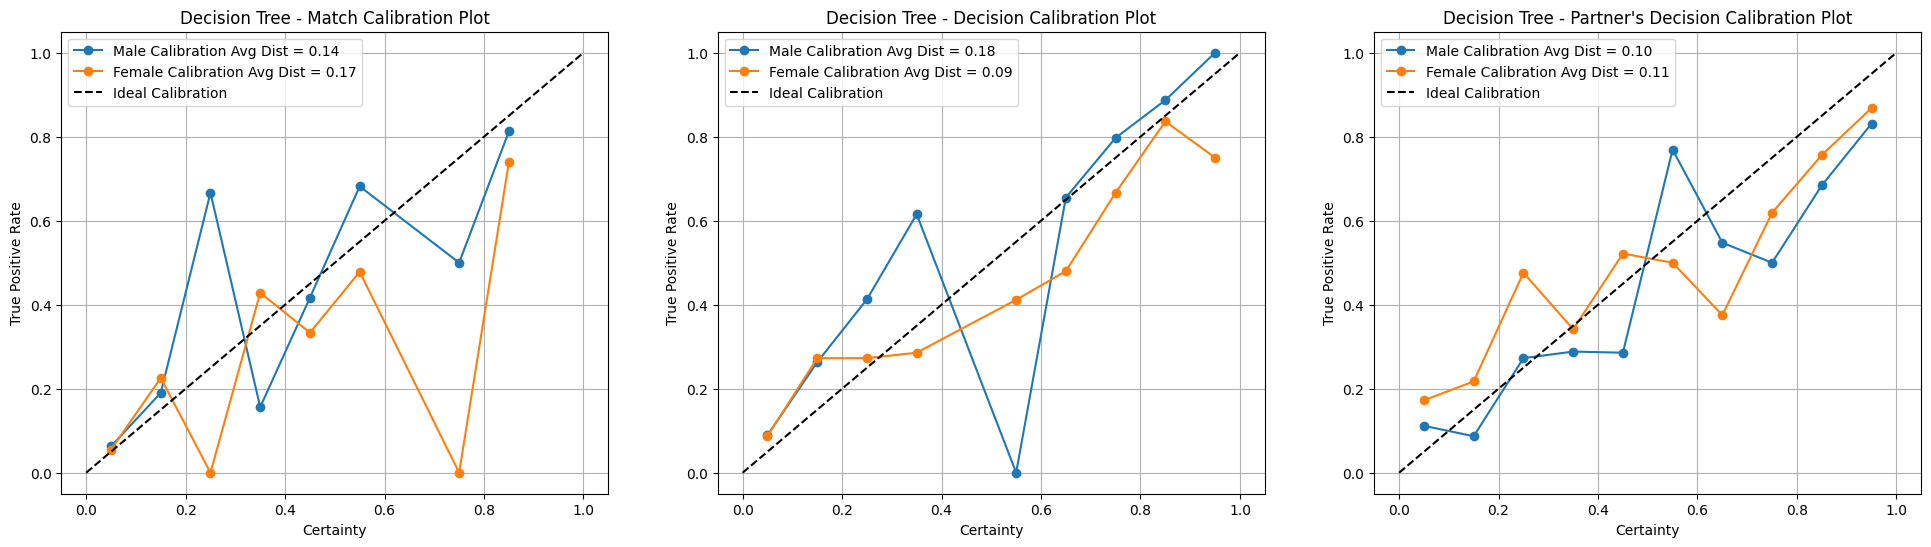

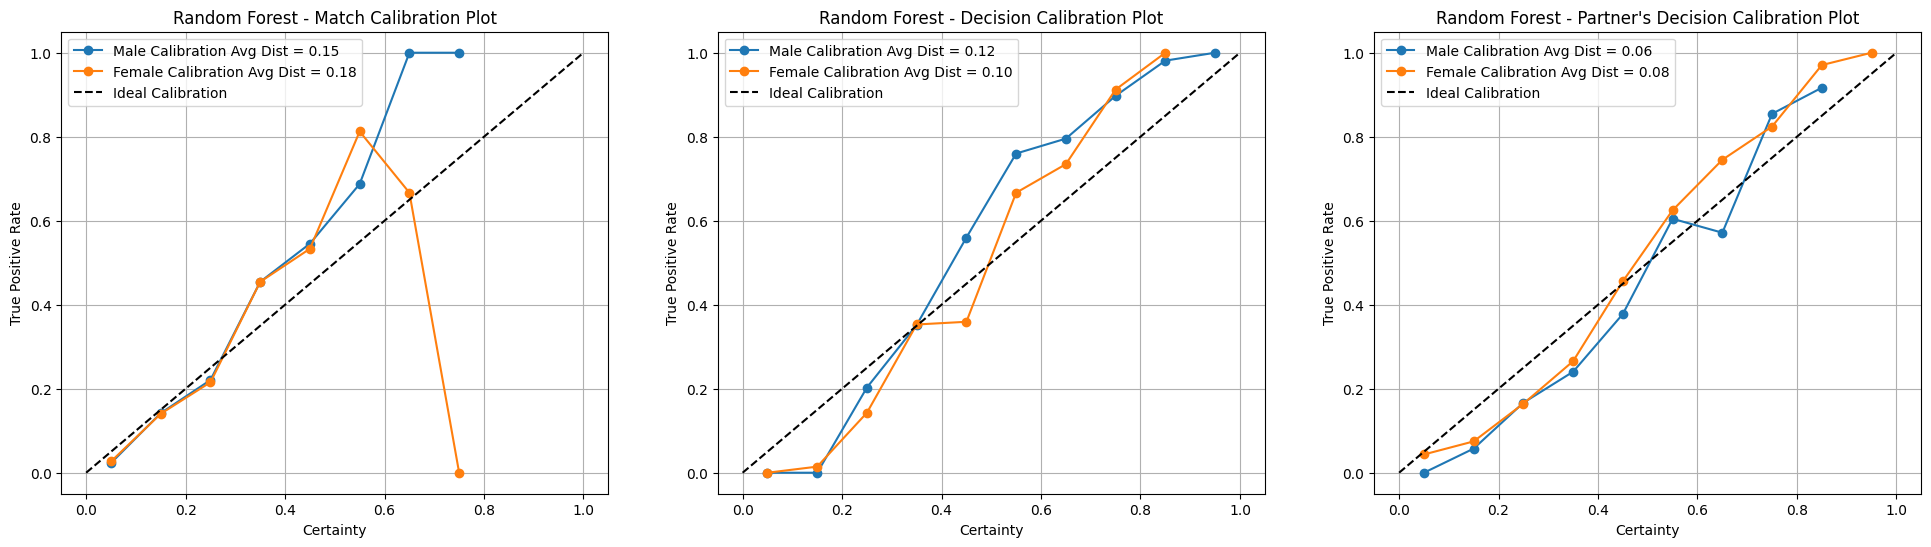

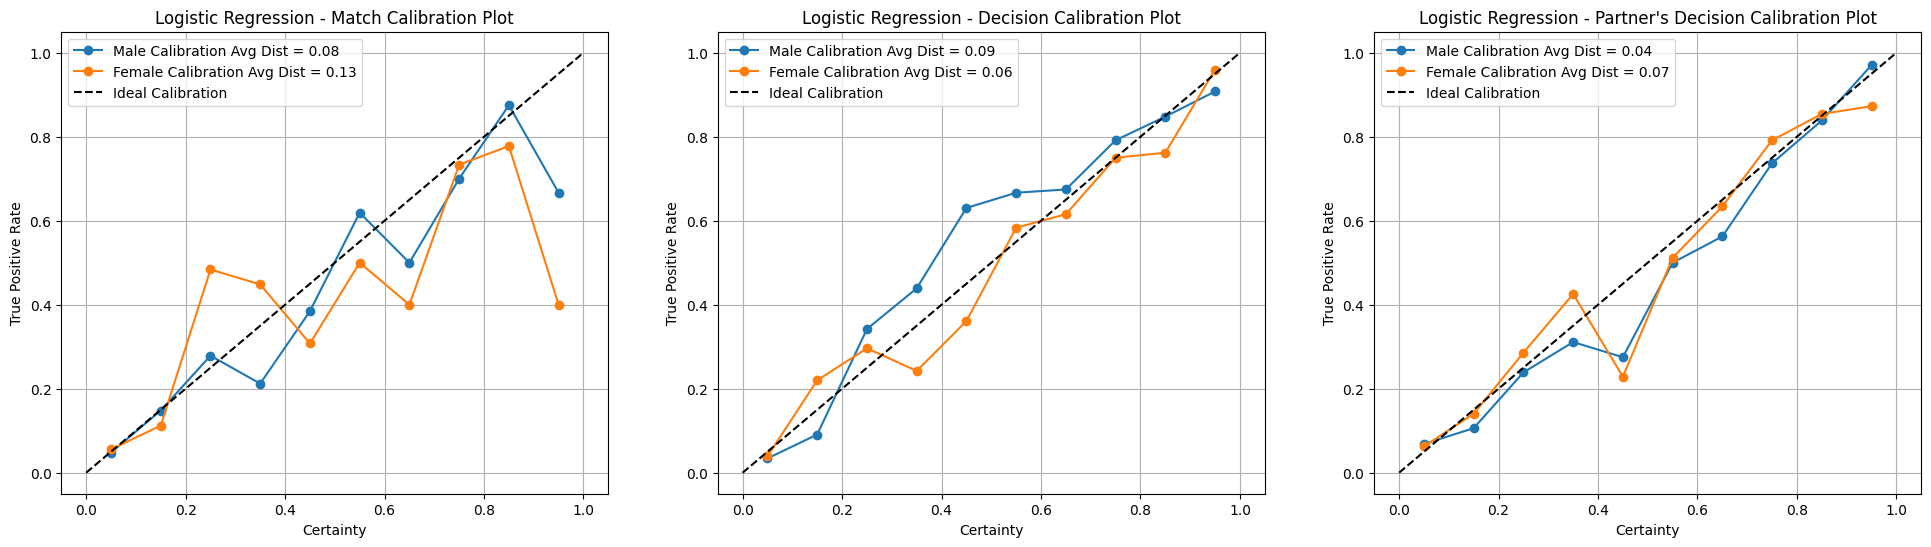

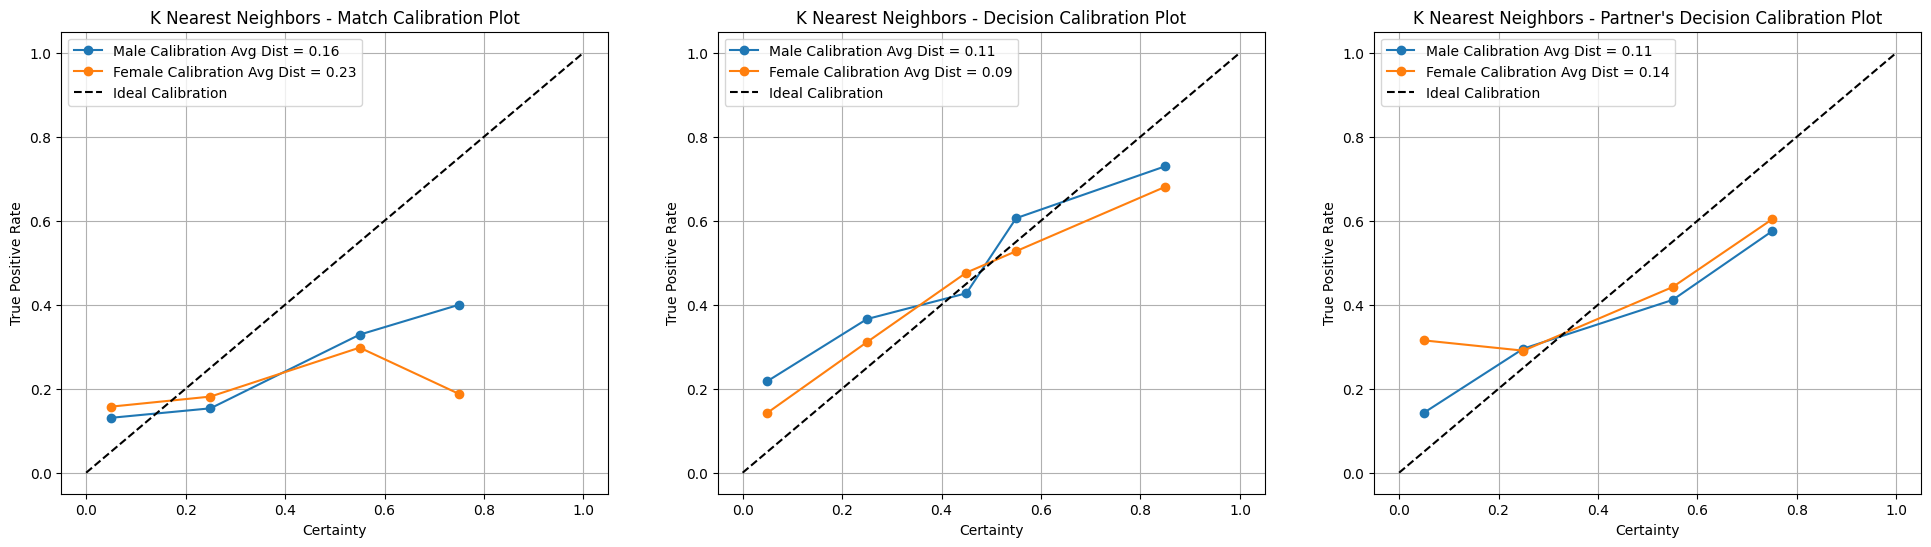

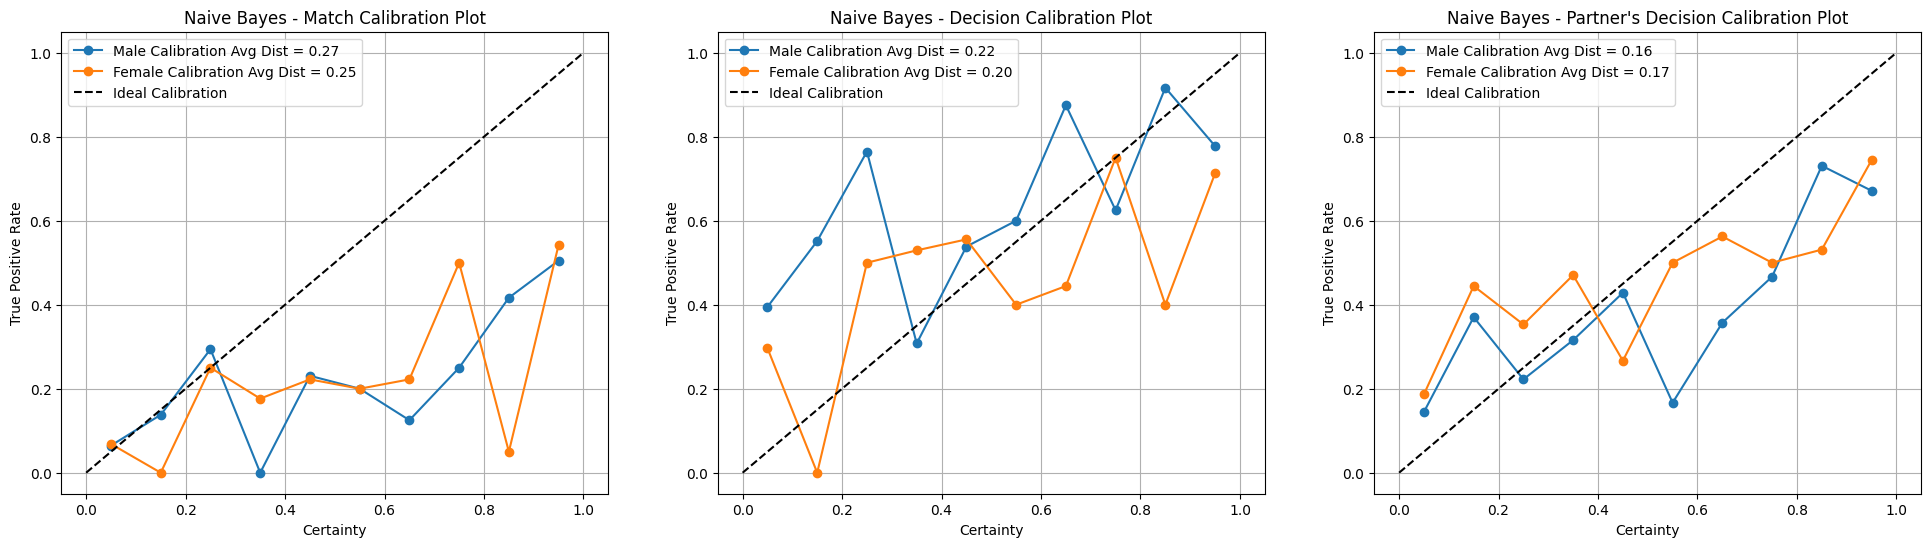

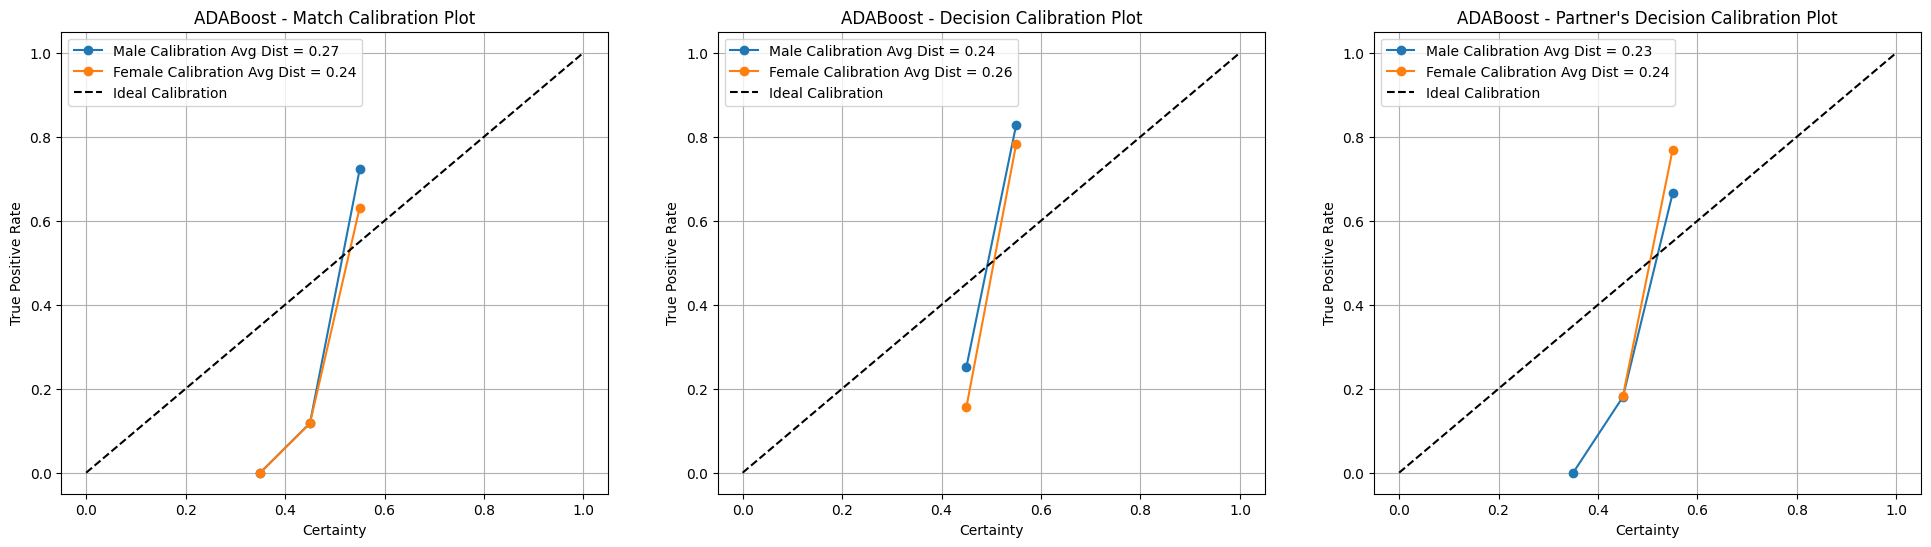

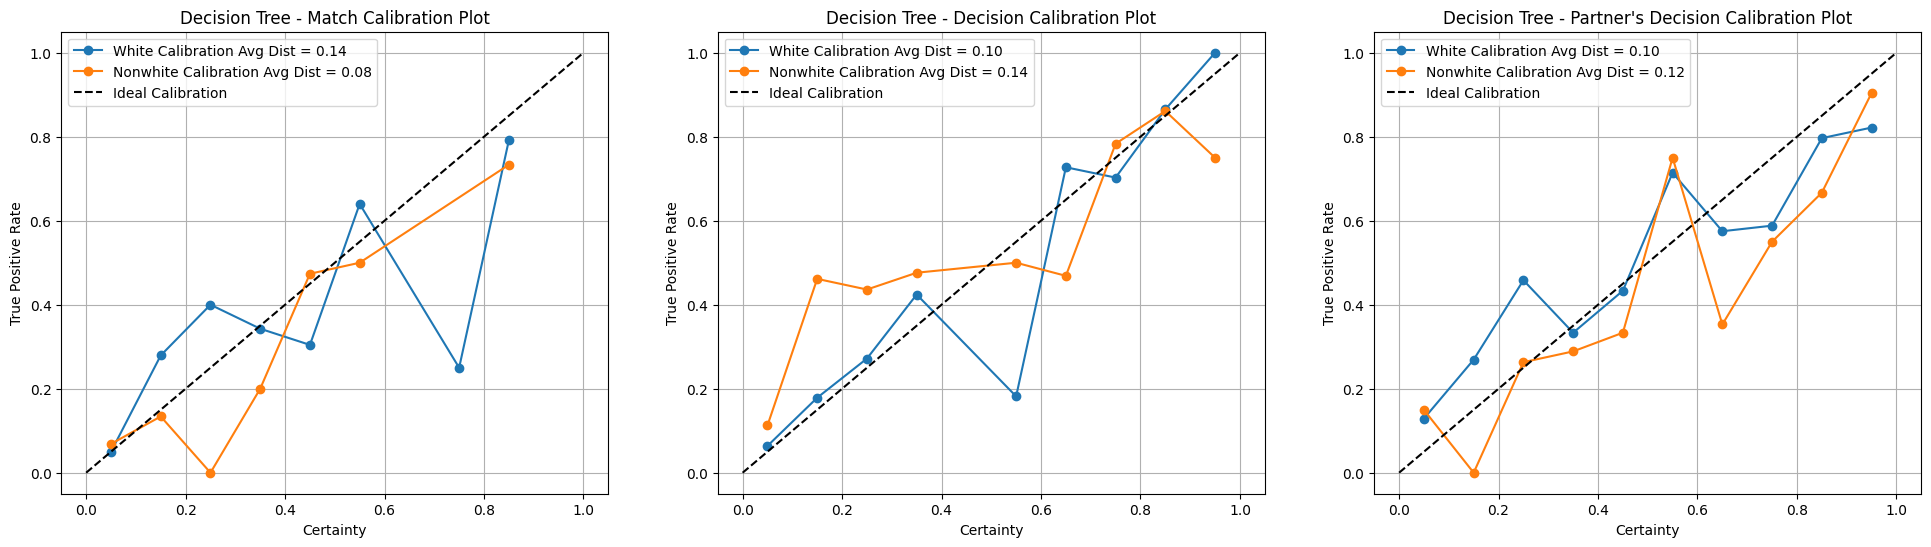

Random Forest - Average White Match Distance to Ideal: 0.13158460588389181
Random Forest - Average Nonwhite Match Distance to Ideal: 0.2041075398841181
Random Forest - Average White Decision Distance to Ideal: 0.10838652385792501
Random Forest - Average Nonwhite Decision Distance to Ideal: 0.11700398718243328
Random Forest - Average White Partner Decision Distance to Ideal: 0.06700756786122636
Random Forest - Average Nonwhite Partner Decision Distance to Ideal: 0.08153836403054639
Random Forest - Average Difference in Match Distance: 0.03189039783135152


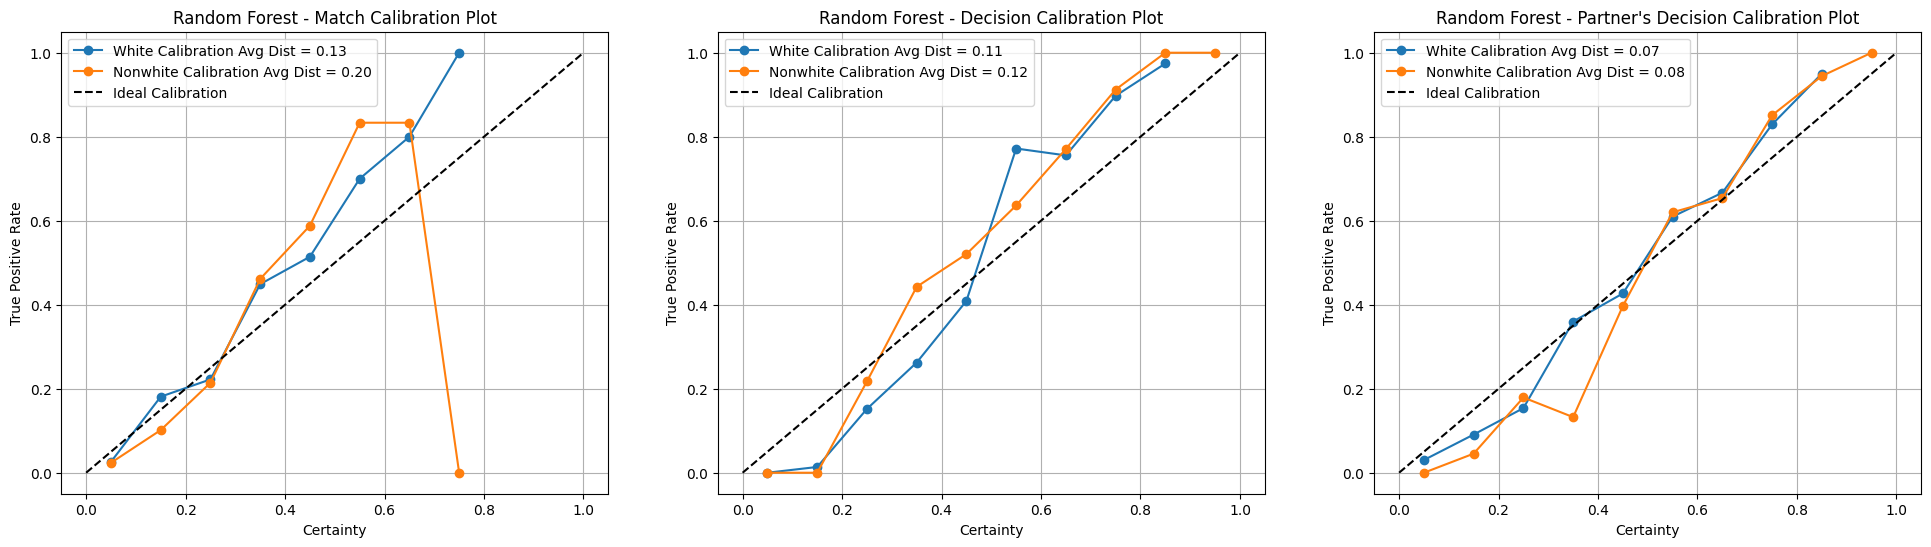

Logistic Regression - Average White Match Distance to Ideal: 0.1622630479580572
Logistic Regression - Average Nonwhite Match Distance to Ideal: 0.09798821677940675
Logistic Regression - Average White Decision Distance to Ideal: 0.09239400546786648
Logistic Regression - Average Nonwhite Decision Distance to Ideal: 0.06925727062992584
Logistic Regression - Average White Partner Decision Distance to Ideal: 0.06968391835996776
Logistic Regression - Average Nonwhite Partner Decision Distance to Ideal: 0.04974925863152078
Logistic Regression - Average Difference in Match Distance: 0.03578207524834603


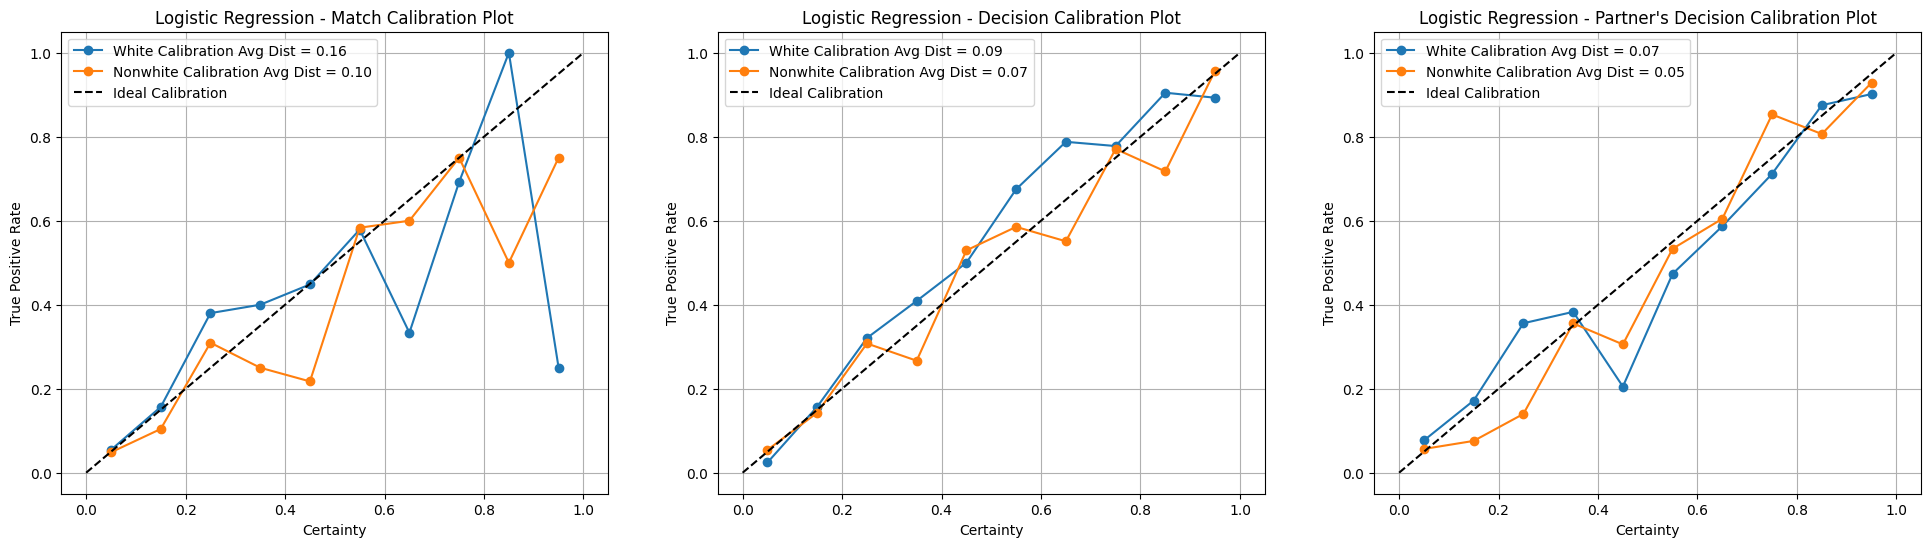

K Nearest Neighbors - Average White Match Distance to Ideal: 0.15348937926852763
K Nearest Neighbors - Average Nonwhite Match Distance to Ideal: 0.2332063059169801
K Nearest Neighbors - Average White Decision Distance to Ideal: 0.08347505034082786
K Nearest Neighbors - Average Nonwhite Decision Distance to Ideal: 0.1199509077183496
K Nearest Neighbors - Average White Partner Decision Distance to Ideal: 0.12924984825170938
K Nearest Neighbors - Average Nonwhite Partner Decision Distance to Ideal: 0.11748152168889939
K Nearest Neighbors - Average Difference in Match Distance: 0.03480815248772141


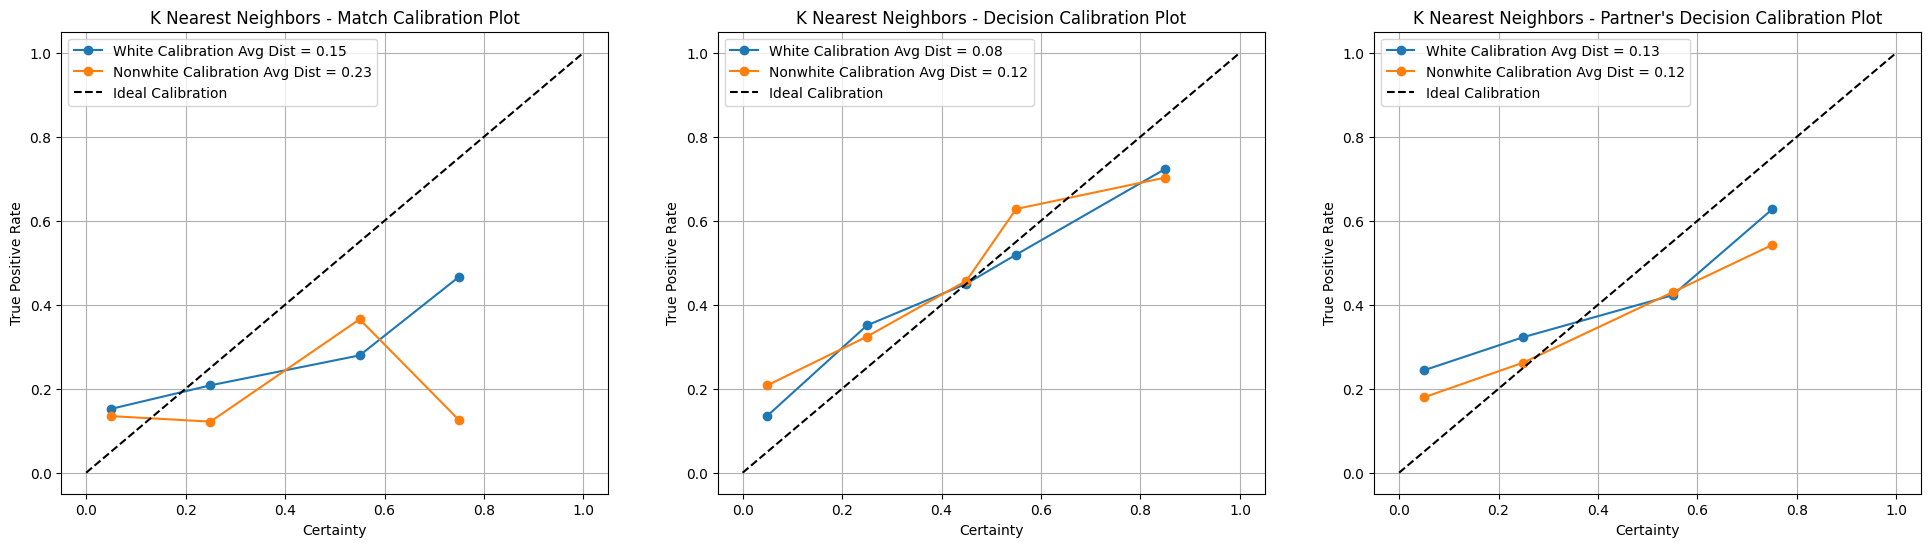

Naive Bayes - Average White Match Distance to Ideal: 0.27056995775643033
Naive Bayes - Average Nonwhite Match Distance to Ideal: 0.2819277848714935
Naive Bayes - Average White Decision Distance to Ideal: 0.16847879667301352
Naive Bayes - Average Nonwhite Decision Distance to Ideal: 0.22309581220839503
Naive Bayes - Average White Partner Decision Distance to Ideal: 0.18333496981175004
Naive Bayes - Average Nonwhite Partner Decision Distance to Ideal: 0.15264794527797626
Naive Bayes - Average Difference in Match Distance: 0.011762606038890297


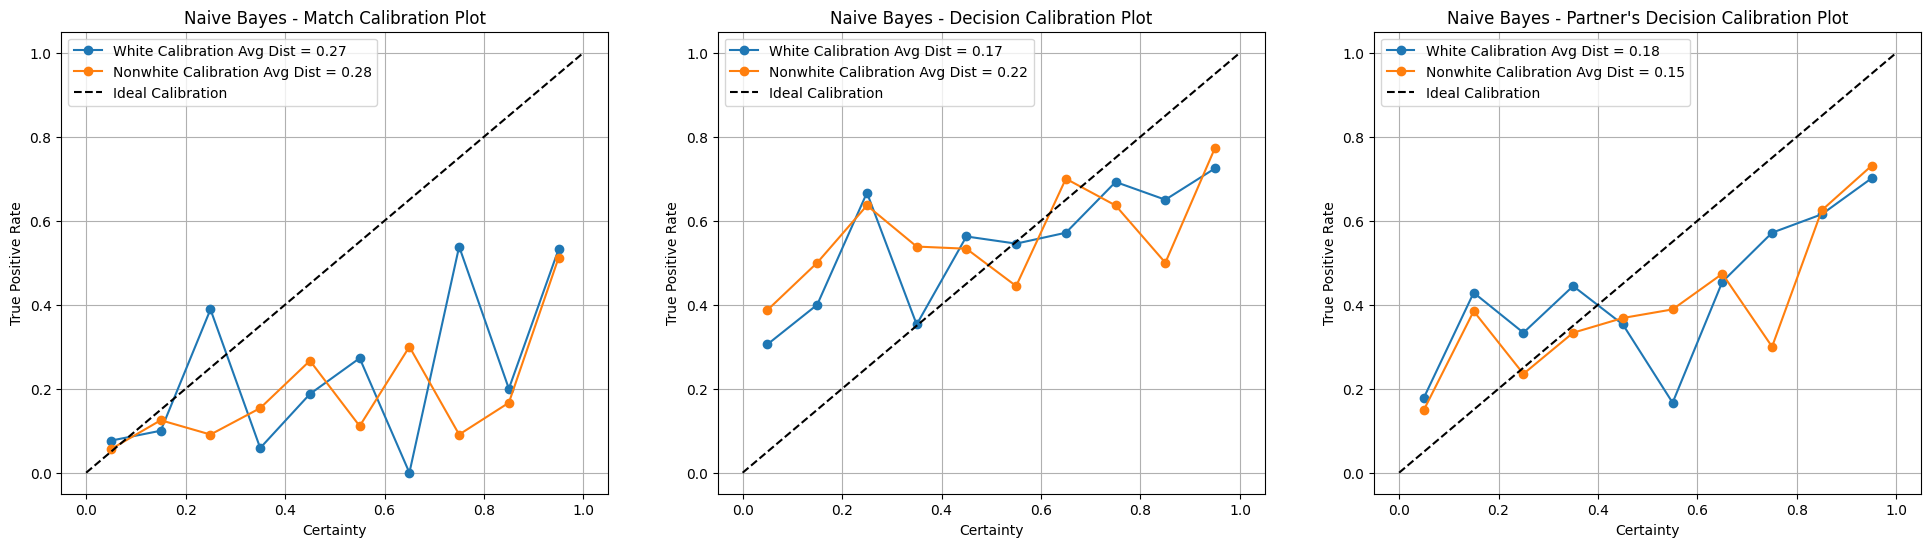

ADABoost - Average White Match Distance to Ideal: 0.25648979273803957
ADABoost - Average Nonwhite Match Distance to Ideal: 0.24731850117096021
ADABoost - Average White Decision Distance to Ideal: 0.272493942010417
ADABoost - Average Nonwhite Decision Distance to Ideal: 0.2296763053450853
ADABoost - Average White Partner Decision Distance to Ideal: 0.20883024716534793
ADABoost - Average Nonwhite Partner Decision Distance to Ideal: 0.25498665331998666
ADABoost - Average Difference in Match Distance: 0.0019441740259241076


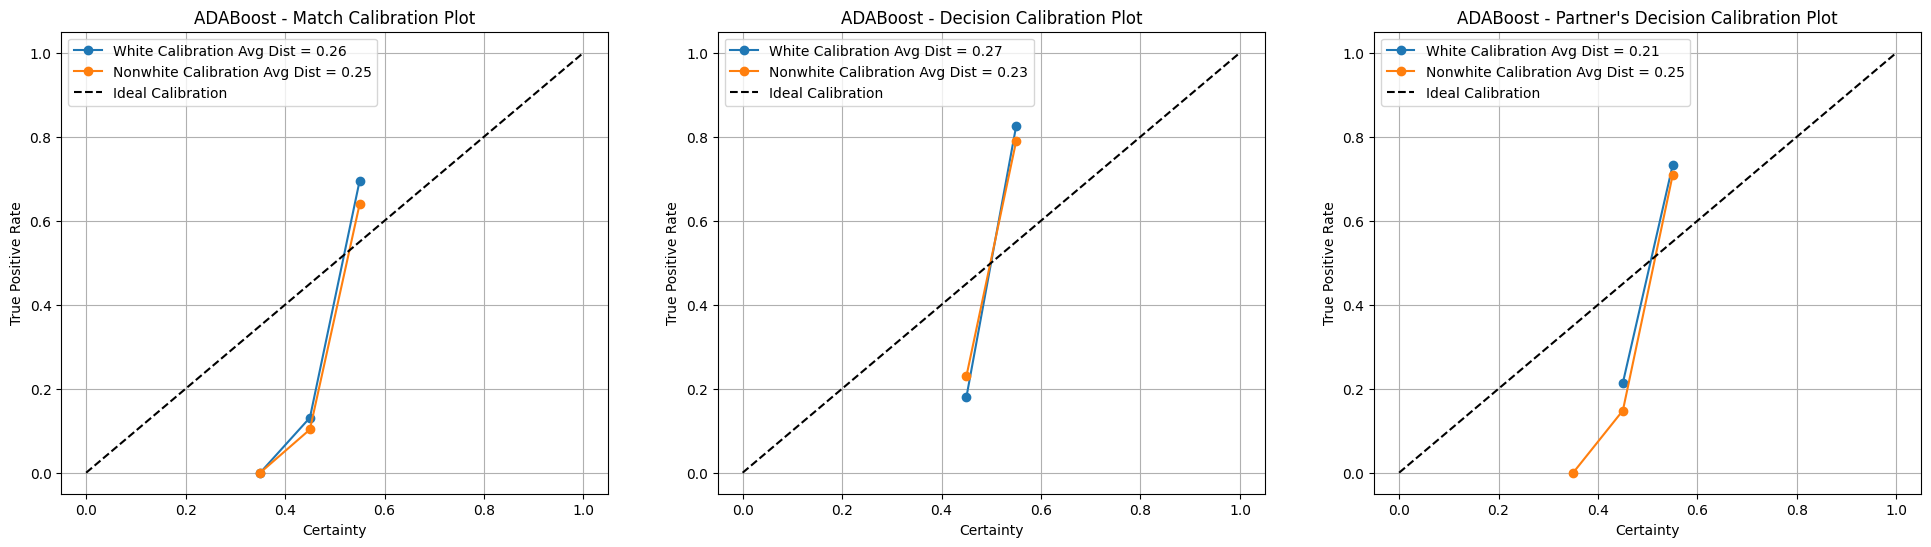

In [ ]:
# Use function to plot calibration by gender for each model

plot_calibration_gender("Decision Tree -", X_test["gender"], match_DT_scores, dec_DT_scores, dec_o_DT_scores, match_y_test, dec_y_test, dec_o_y_test)
plot_calibration_gender("Random Forest -", X_test["gender"], match_RF_scores, dec_RF_scores, dec_o_RF_scores, match_y_test, dec_y_test, dec_o_y_test)
plot_calibration_gender("Logistic Regression -", X_test["gender"], match_cls_scores, dec_cls_scores, dec_o_cls_scores, match_y_test, dec_y_test, dec_o_y_test)
plot_calibration_gender("K Nearest Neighbors -", X_test["gender"], match_knn_scores, dec_knn_scores, dec_o_knn_scores, match_y_test, dec_y_test, dec_o_y_test)
plot_calibration_gender("Naive Bayes -", X_test["gender"], match_NB_scores, dec_NB_scores, dec_o_NB_scores, match_y_test, dec_y_test, dec_o_y_test)
plot_calibration_gender("ADABoost -", X_test["gender"], match_adaboost_scores, dec_adaboost_scores, dec_o_adaboost_scores, match_y_test, dec_y_test, dec_o_y_test)

plot_calibration_race("Decision Tree -", X_test["race_White"], match_DT_scores, dec_DT_scores, dec_o_DT_scores, match_y_test, dec_y_test, dec_o_y_test)
plot_calibration_race("Random Forest -", X_test["race_White"], match_RF_scores, dec_RF_scores, dec_o_RF_scores, match_y_test, dec_y_test, dec_o_y_test)
plot_calibration_race("Logistic Regression -", X_test["race_White"], match_cls_scores, dec_cls_scores, dec_o_cls_scores, match_y_test, dec_y_test, dec_o_y_test)
plot_calibration_race("K Nearest Neighbors -", X_test["race_White"], match_knn_scores, dec_knn_scores, dec_o_knn_scores, match_y_test, dec_y_test, dec_o_y_test)
plot_calibration_race("Naive Bayes -", X_test["race_White"], match_NB_scores, dec_NB_scores, dec_o_NB_scores, match_y_test, dec_y_test, dec_o_y_test)
plot_calibration_race("ADABoost -", X_test["race_White"], match_adaboost_scores, dec_adaboost_scores, dec_o_adaboost_scores, match_y_test, dec_y_test, dec_o_y_test)